<a href="https://colab.research.google.com/github/1Jigeesha/Object-Detection/blob/main/YOLOv5_Logo_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Brand Logos Detection**

# 1.Setup

Clone repo, install dependencies and check PyTorch and GPU.

In [1]:
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
%pip install -qr requirements.txt  # install dependencies

import torch
from IPython.display import Image, clear_output  # to display images

clear_output()
print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Setup complete. Using torch 1.9.0+cu102 (Tesla K80)


**2. Unzipping the dataset**

In [2]:
!unzip -q "/content/train_data.zip" -d "/content/train_data"

**3.Steps before training**
  1. Go to yolov5/data
  2. Modify coco128.yaml

    edit the following things inside:

        -- Train and val images paths

        -- No.of classes and class names

**4. Training the Yolov5 model**

In [ ]:
# Tensorboard  (optional)
%load_ext tensorboard
%tensorboard --logdir runs/train

In [ ]:
# Weights & Biases  (optional)
%pip install -q wandb
import wandb
wandb.login()

In [ ]:
# Train YOLOv5s on Logos dataset for 60 epochs as our dataset is hundreds of images 
!python train.py --img 640 --batch 16 --epochs 60 --data custom_data.yaml --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=custom_data.yaml, hyp=data/hyps/hyp.scratch.yaml, epochs=60, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, adam=False, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, patience=100, freeze=0, save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v5.0-495-g5afc9c2 torch 1.9.0+cu102 CPU

hyperparameters: lr0=0.01, lrf=0.2, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0.0, translate=0.1, scale=0.5, shear=0.0, perspective=0.0

The output is saved in runs folder

**5. Display the predictions made**

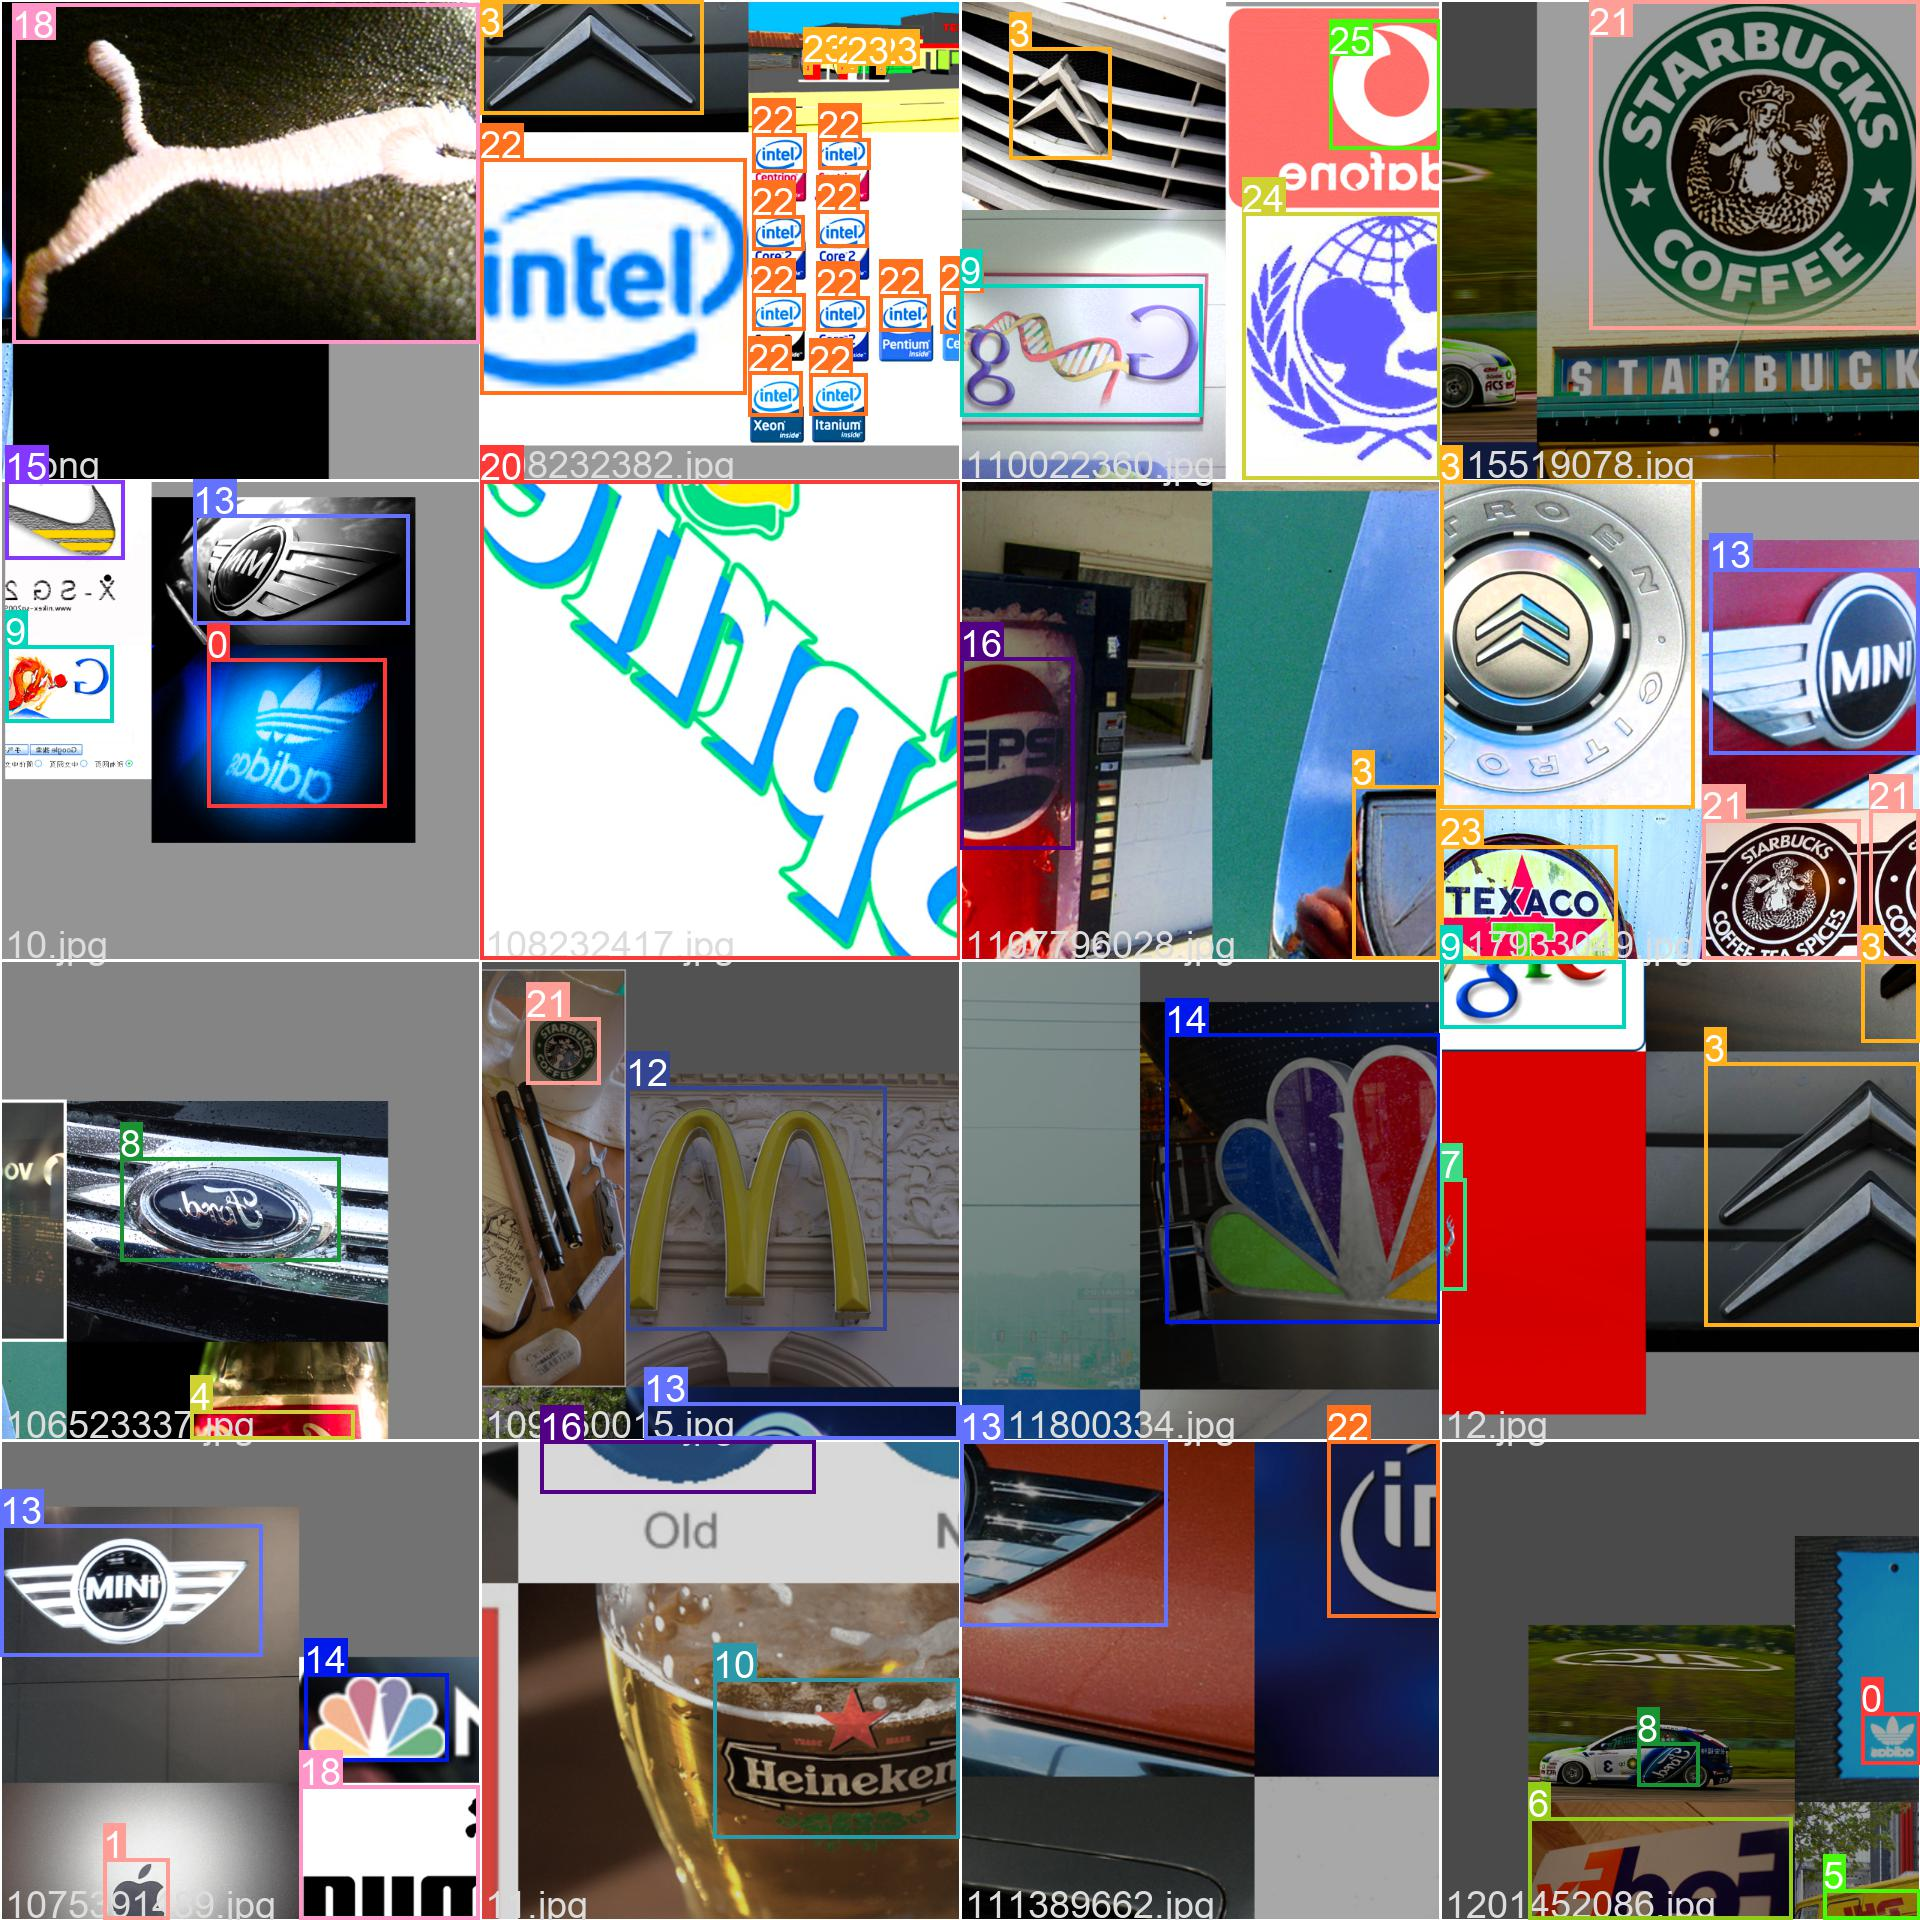

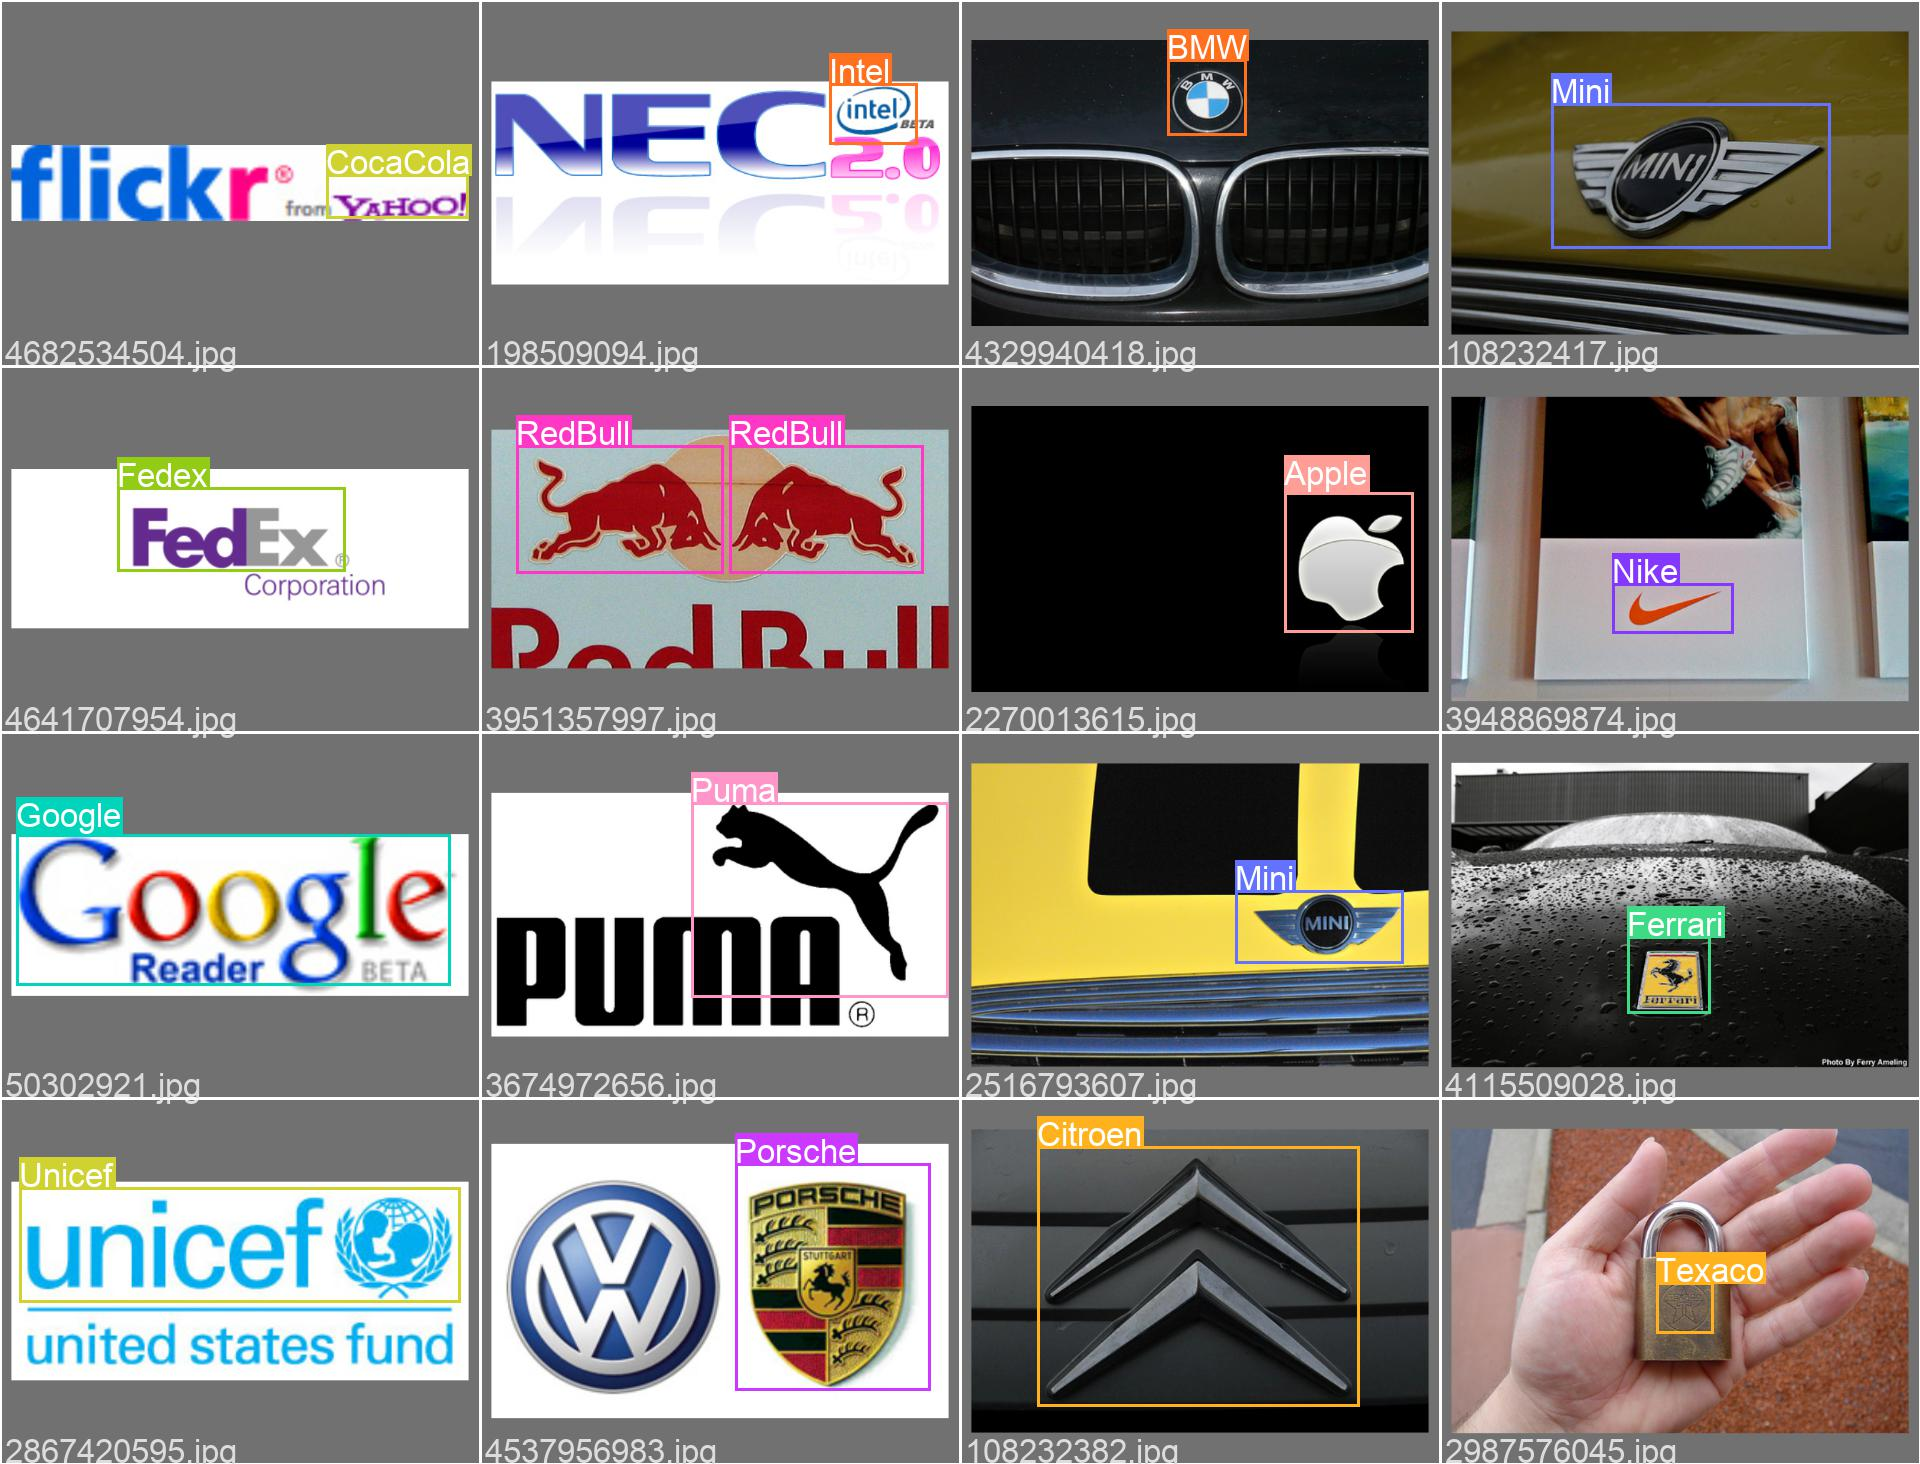

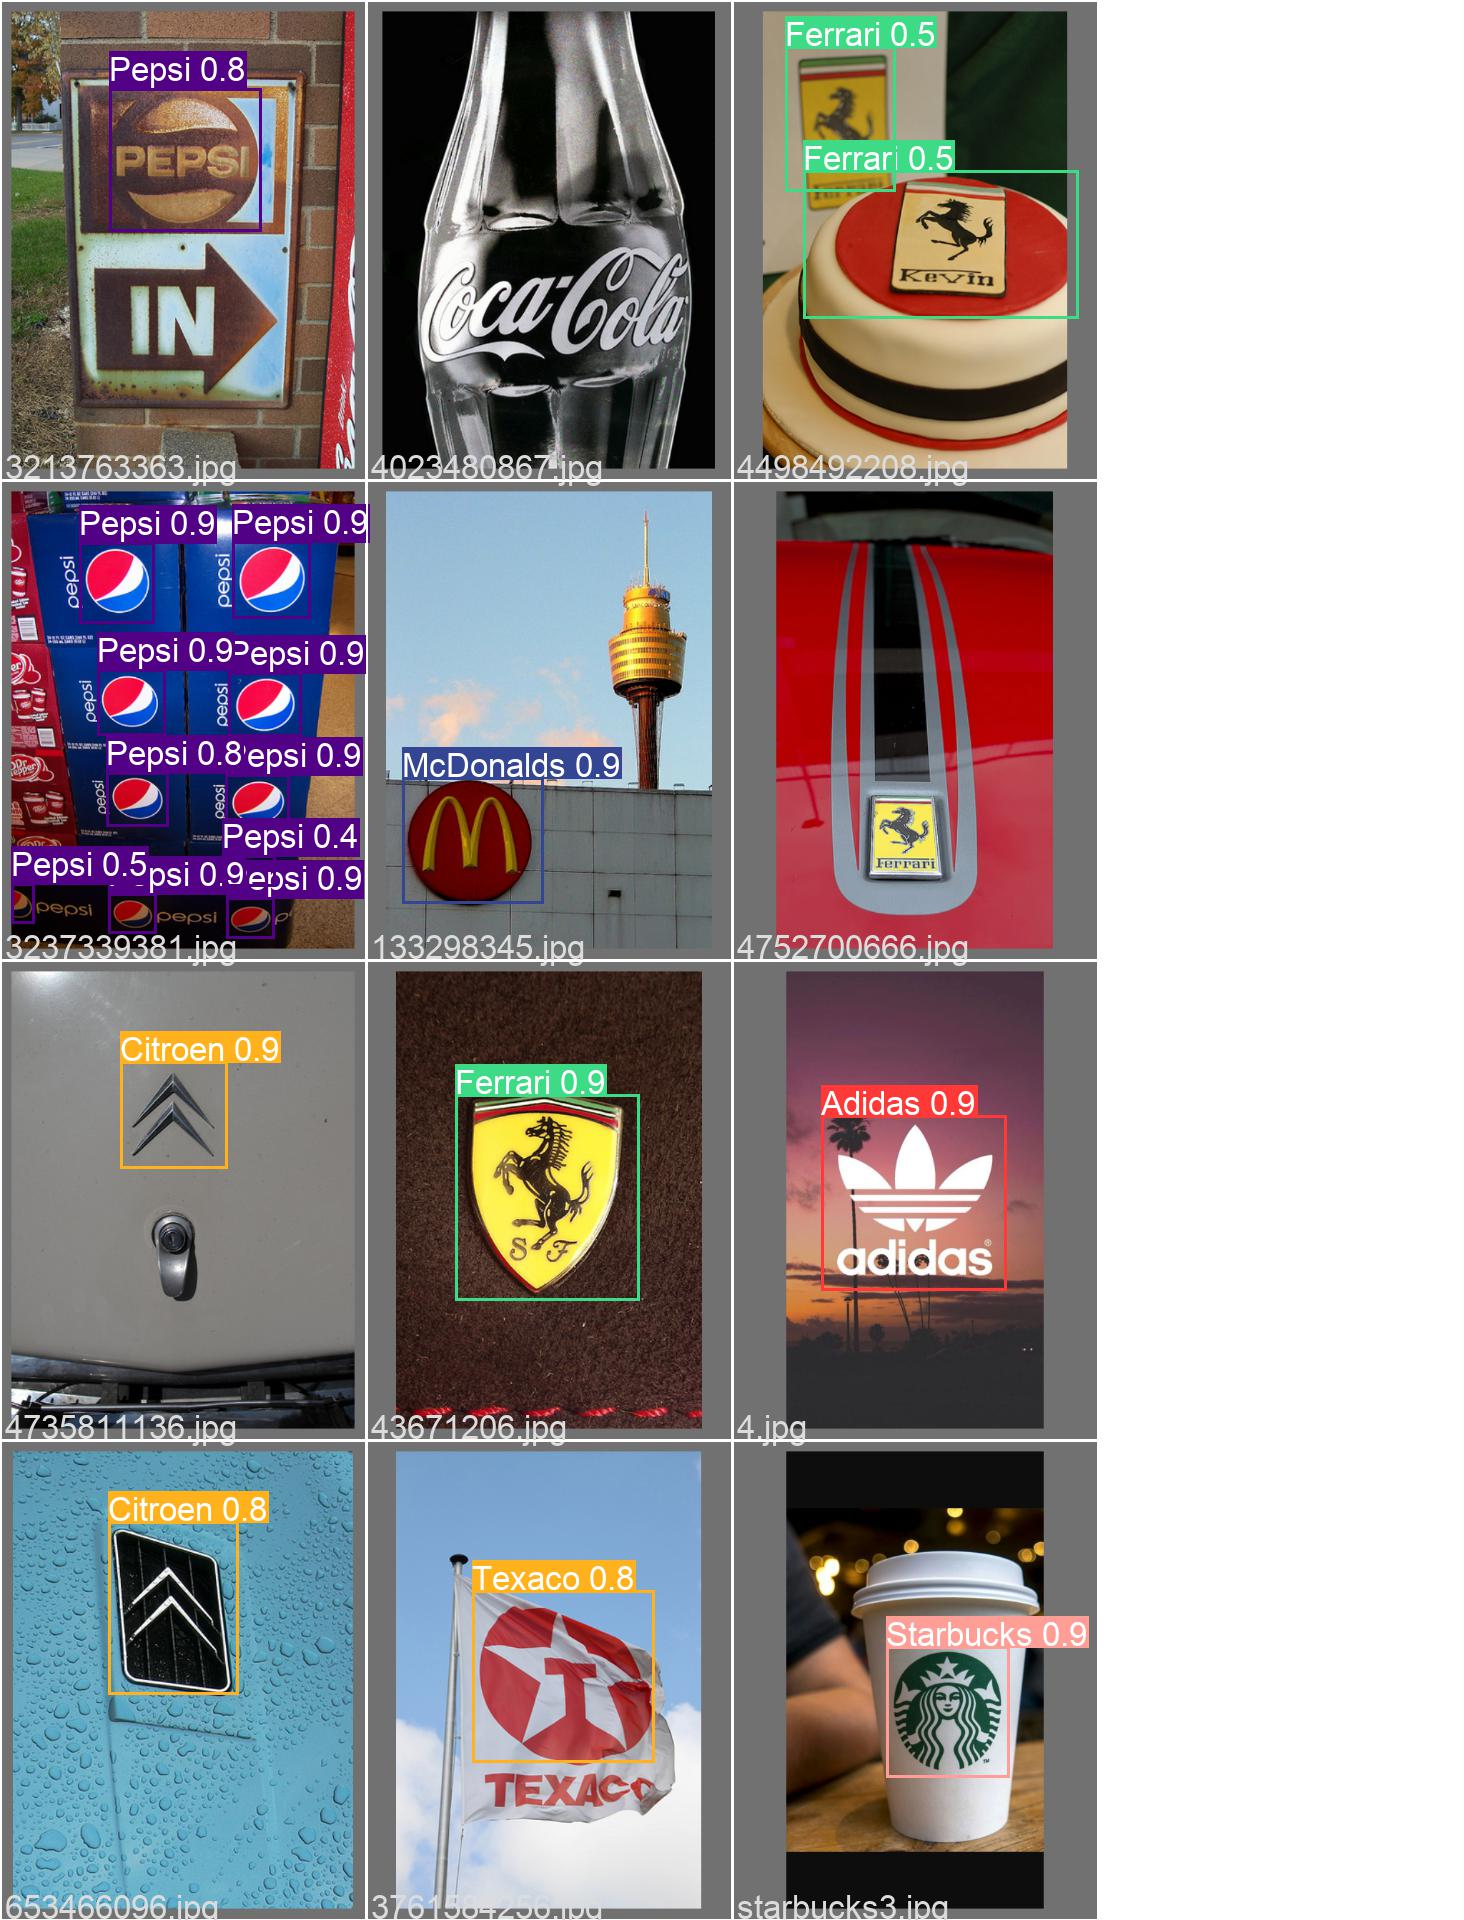

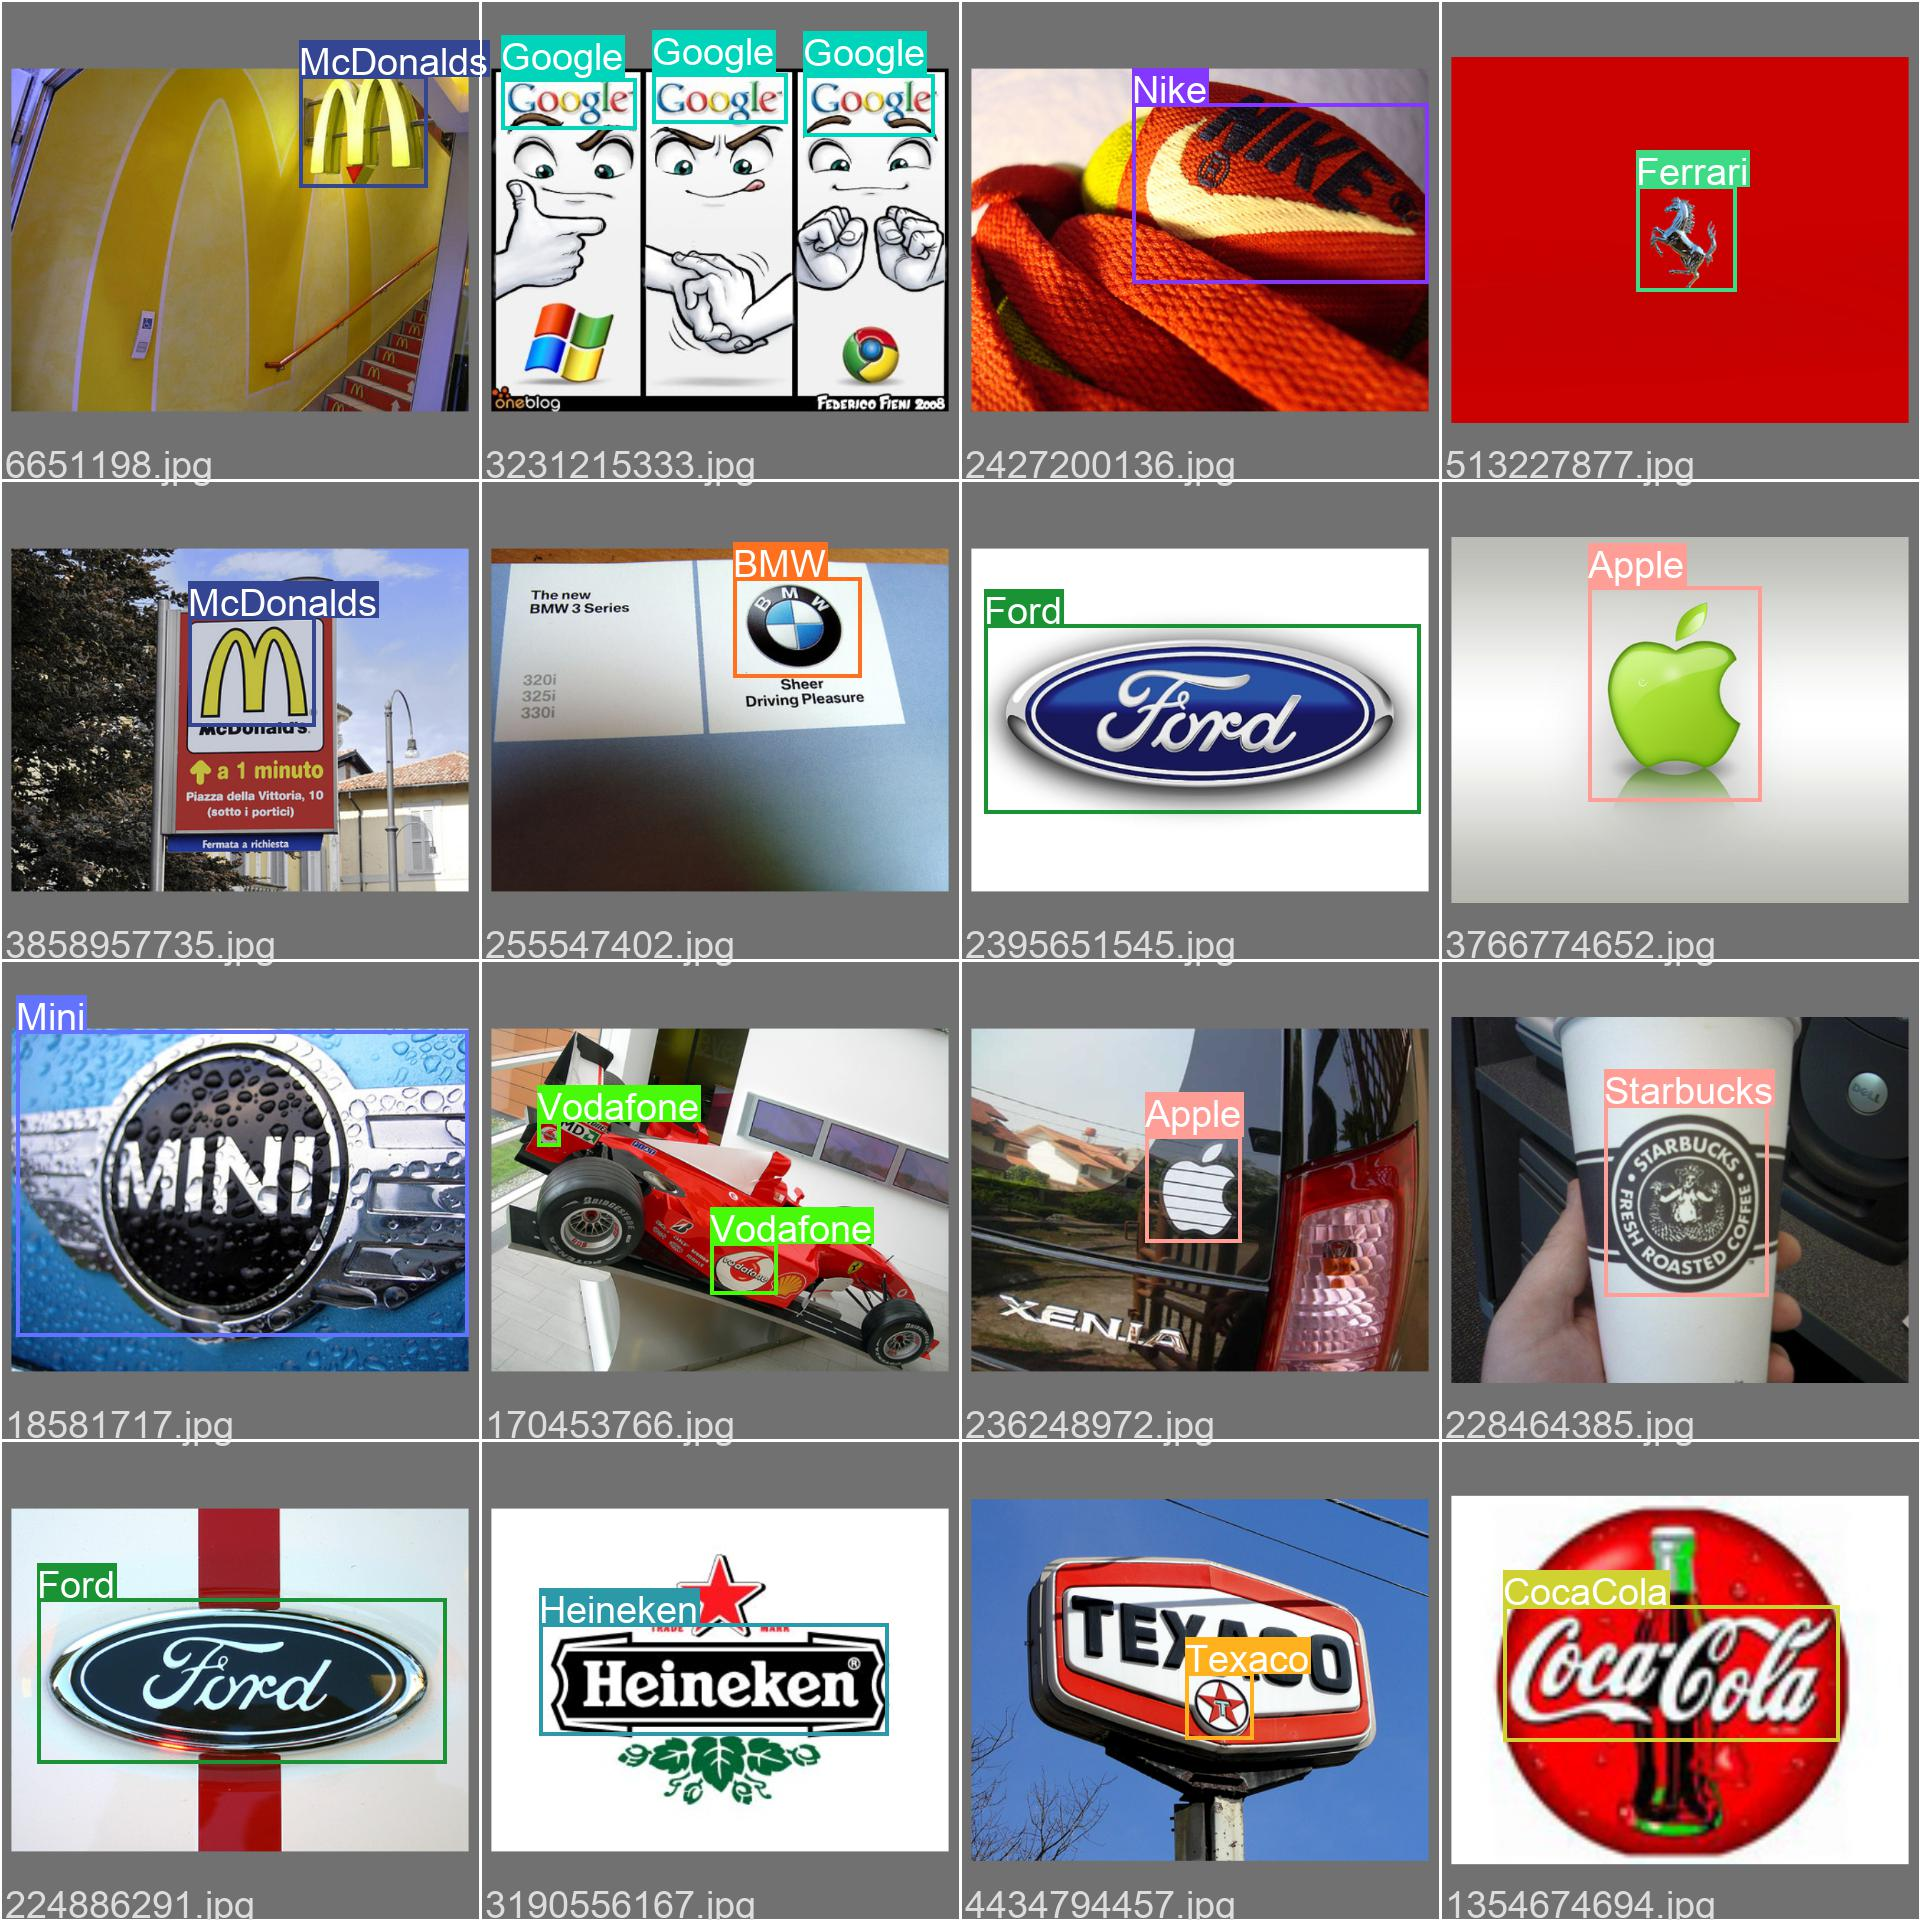

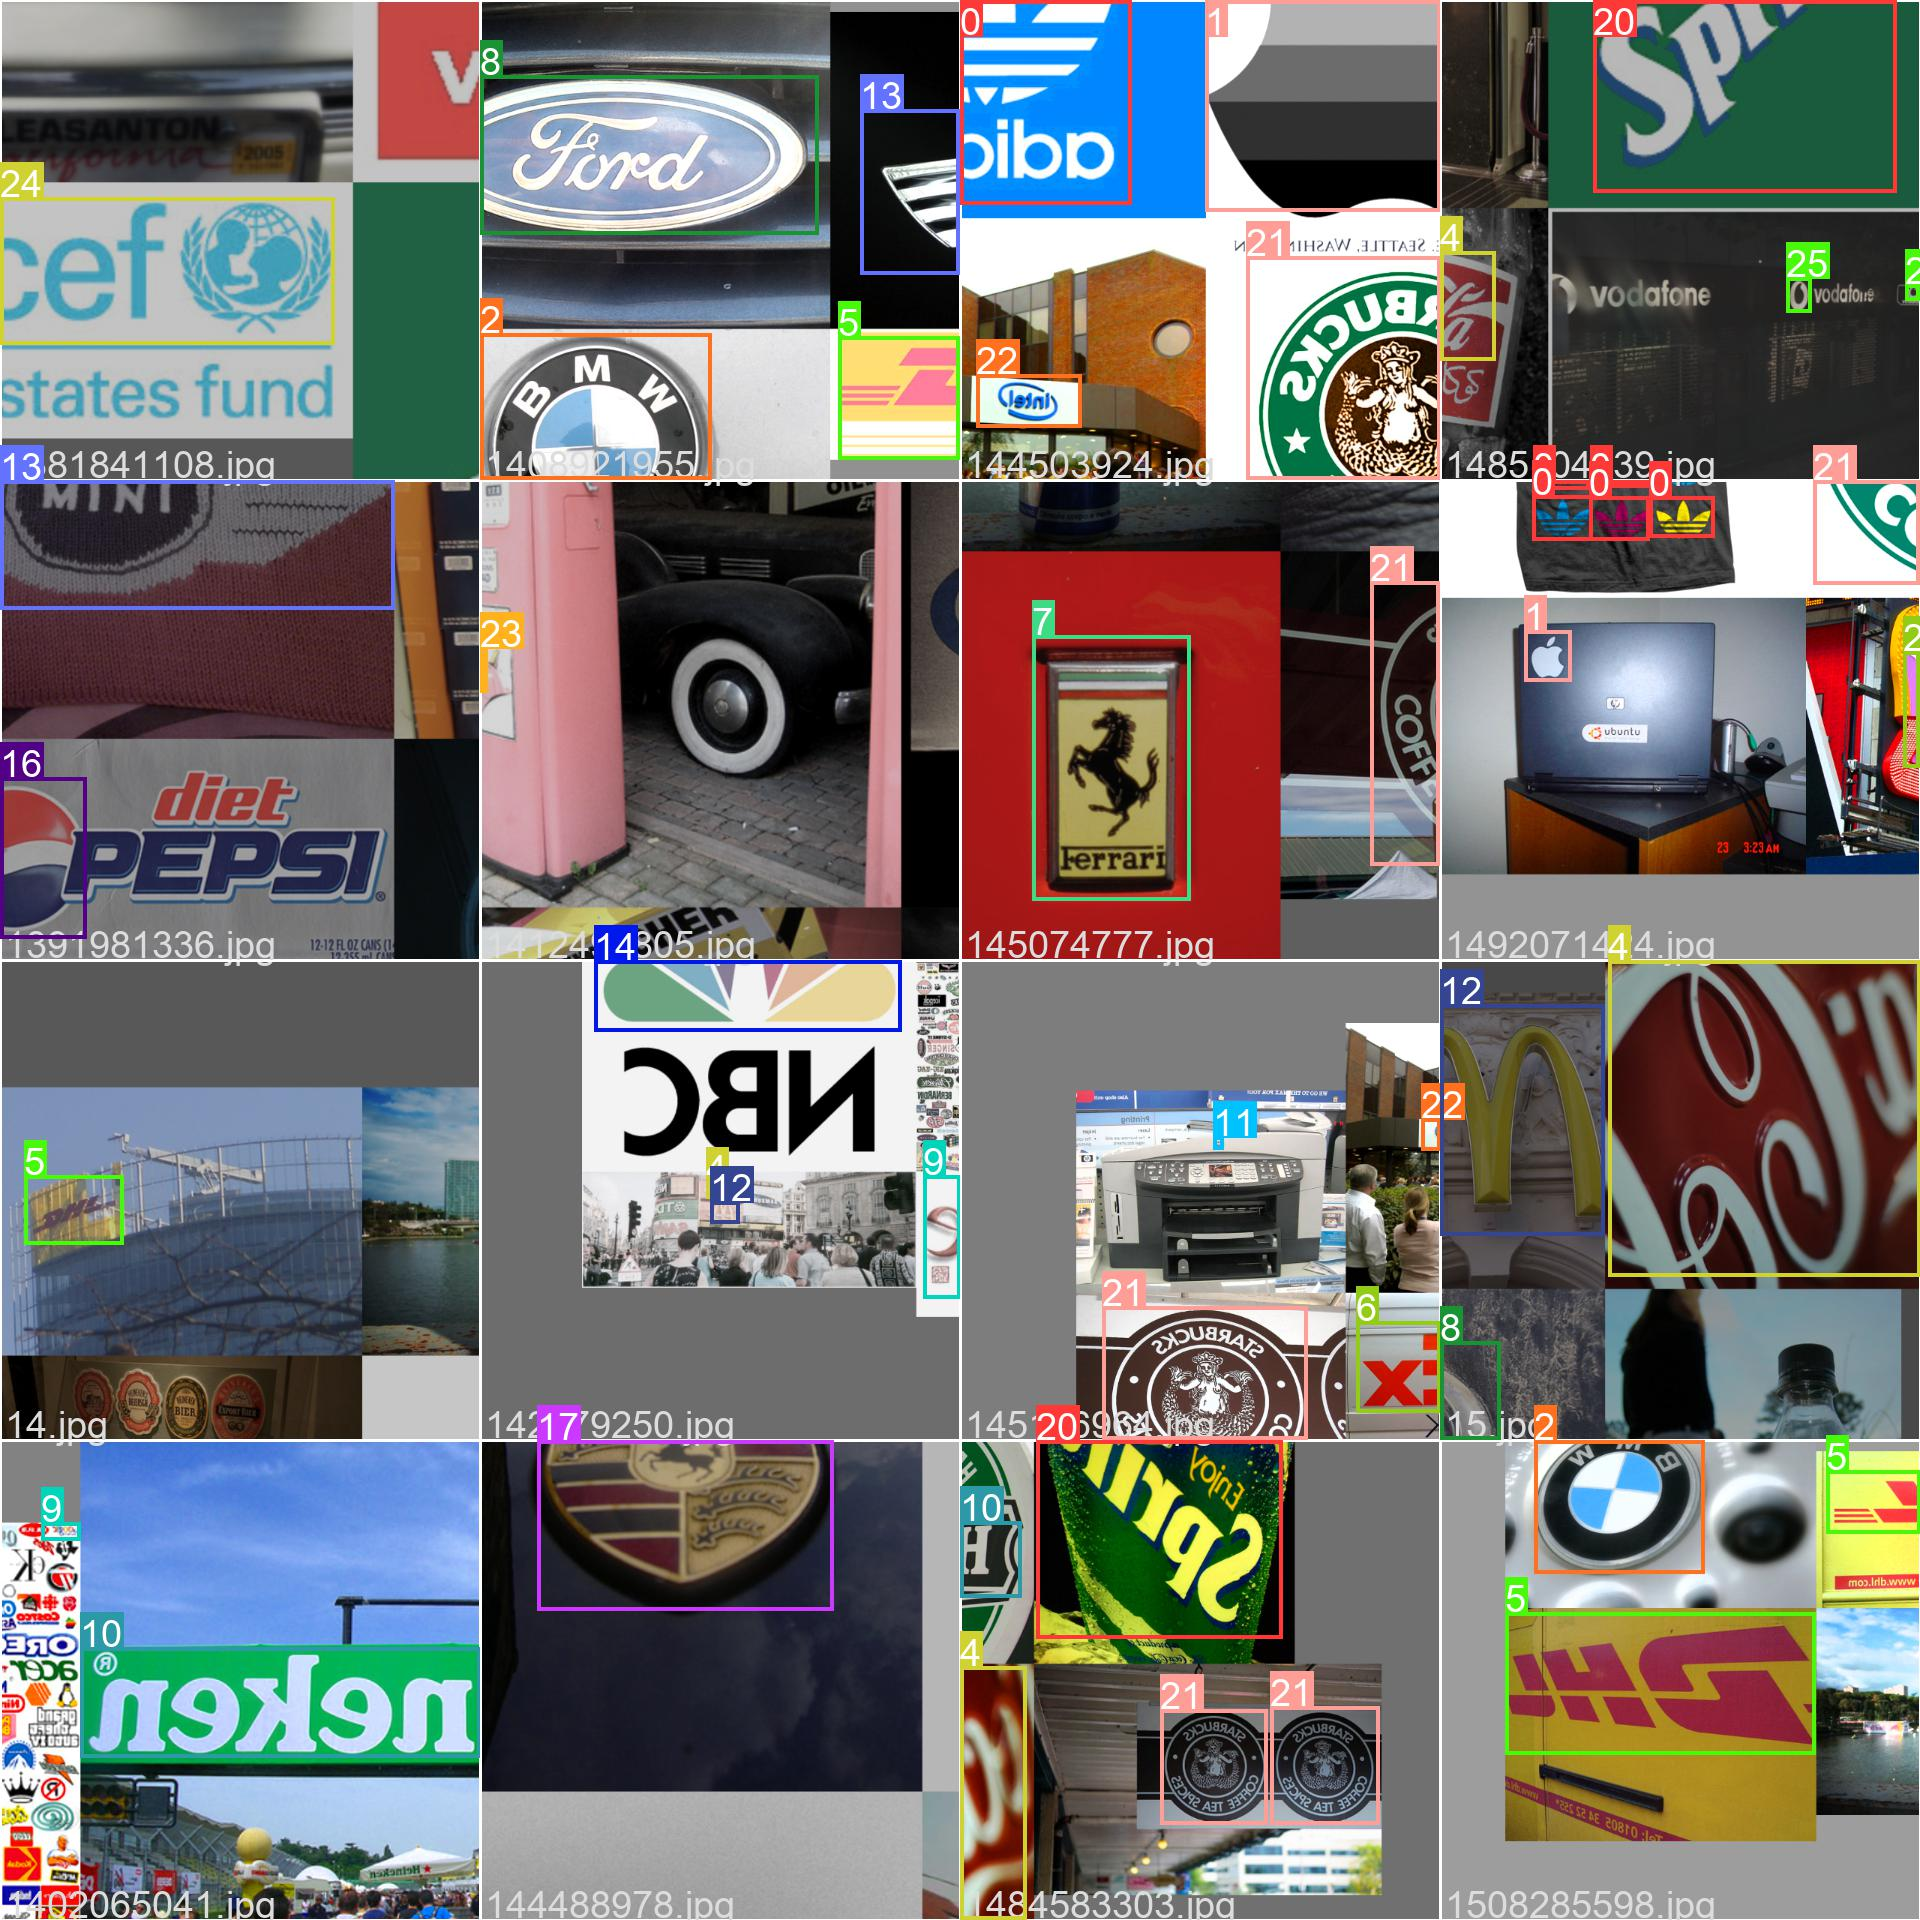

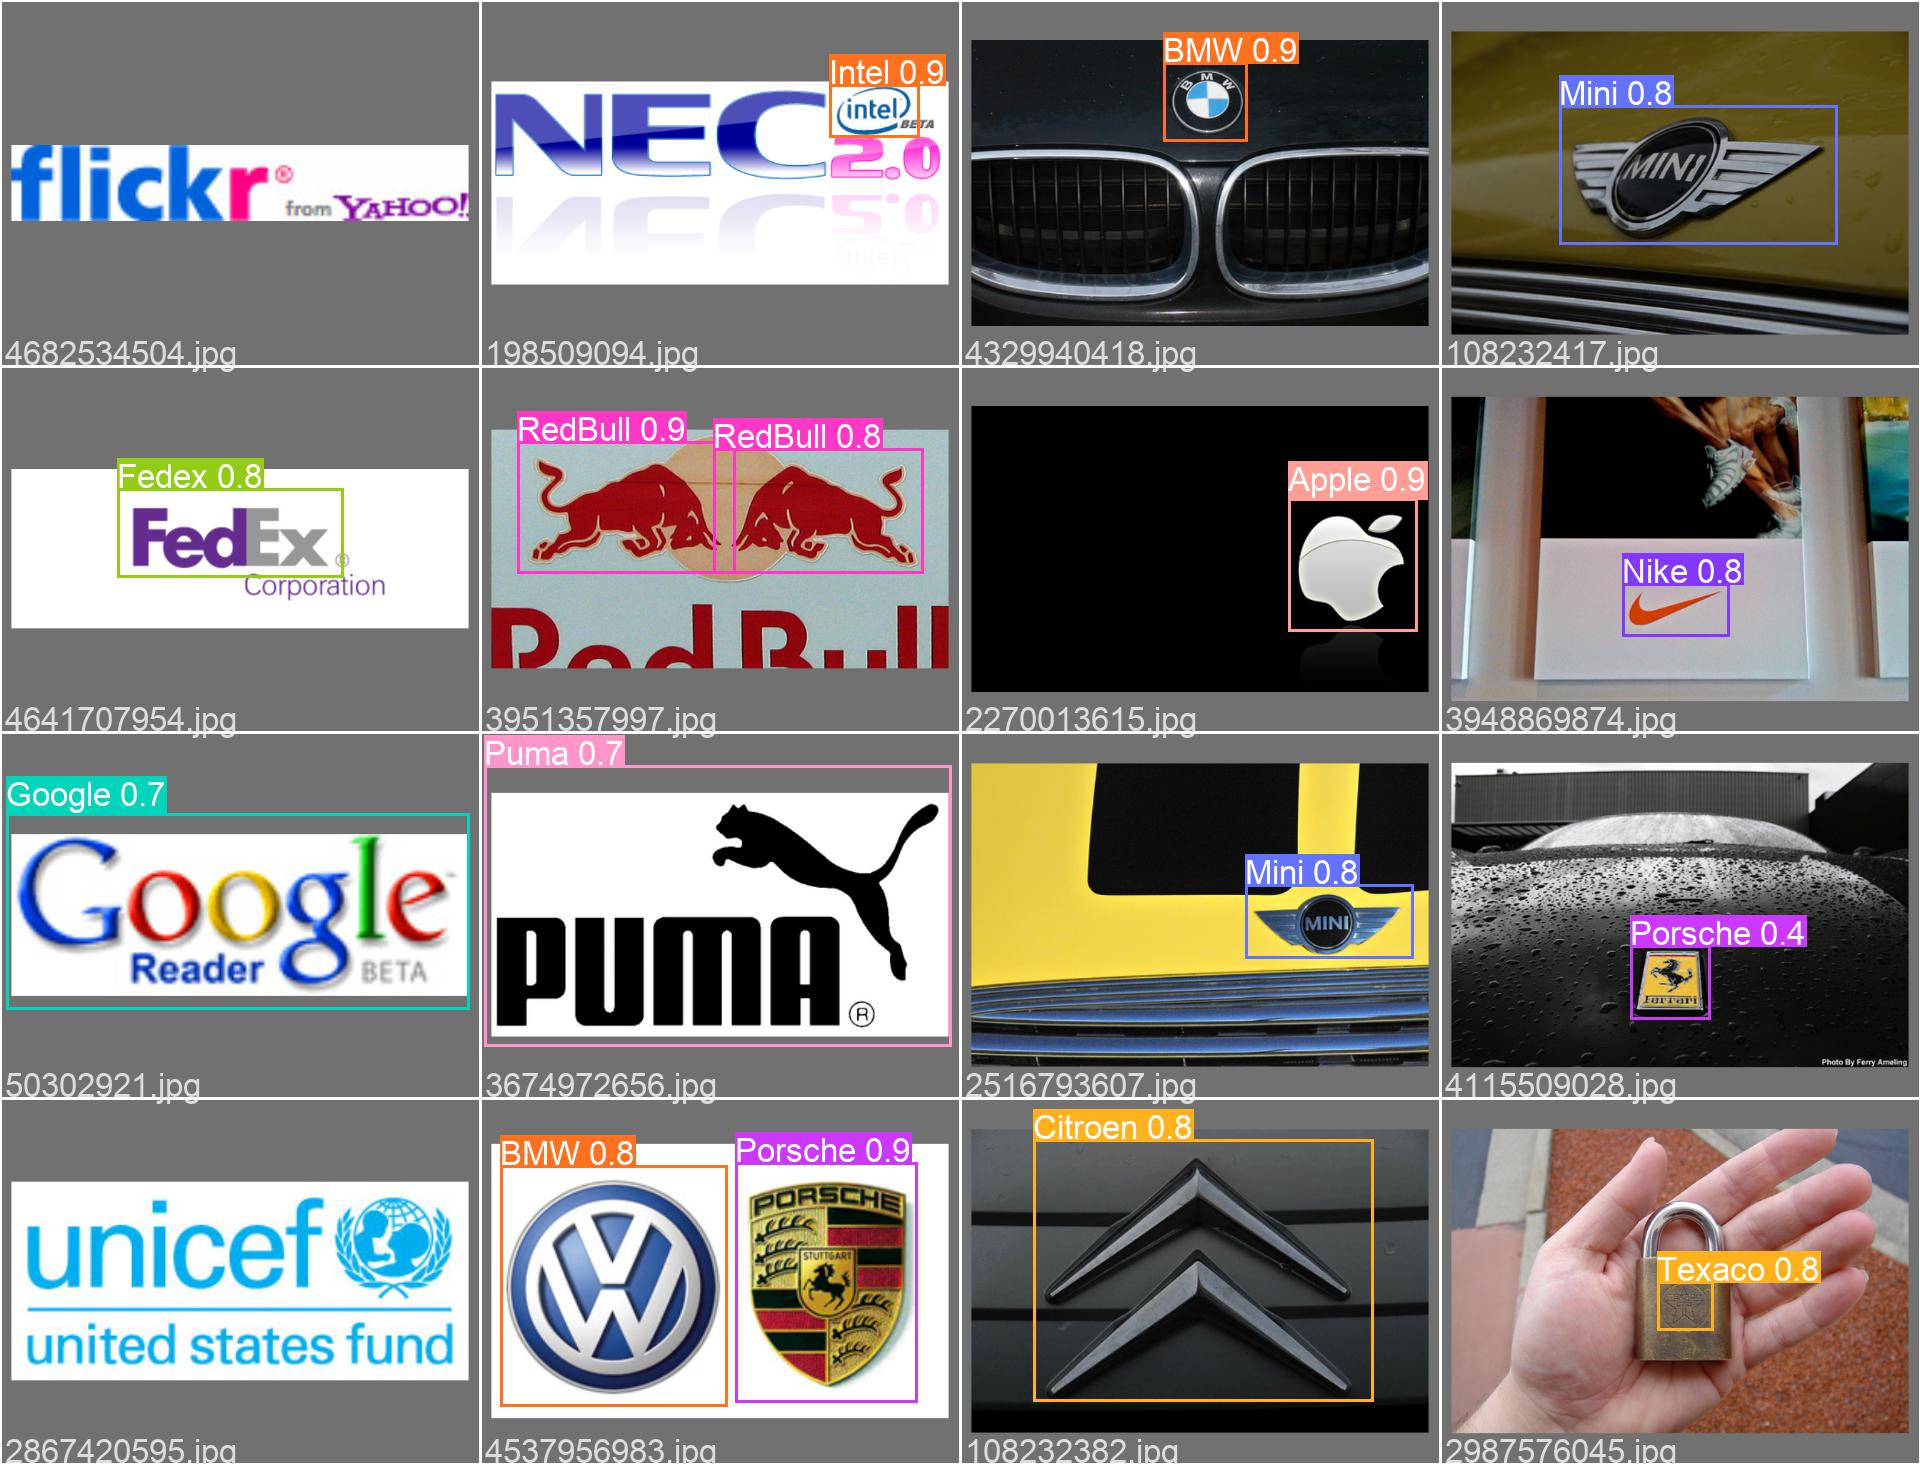

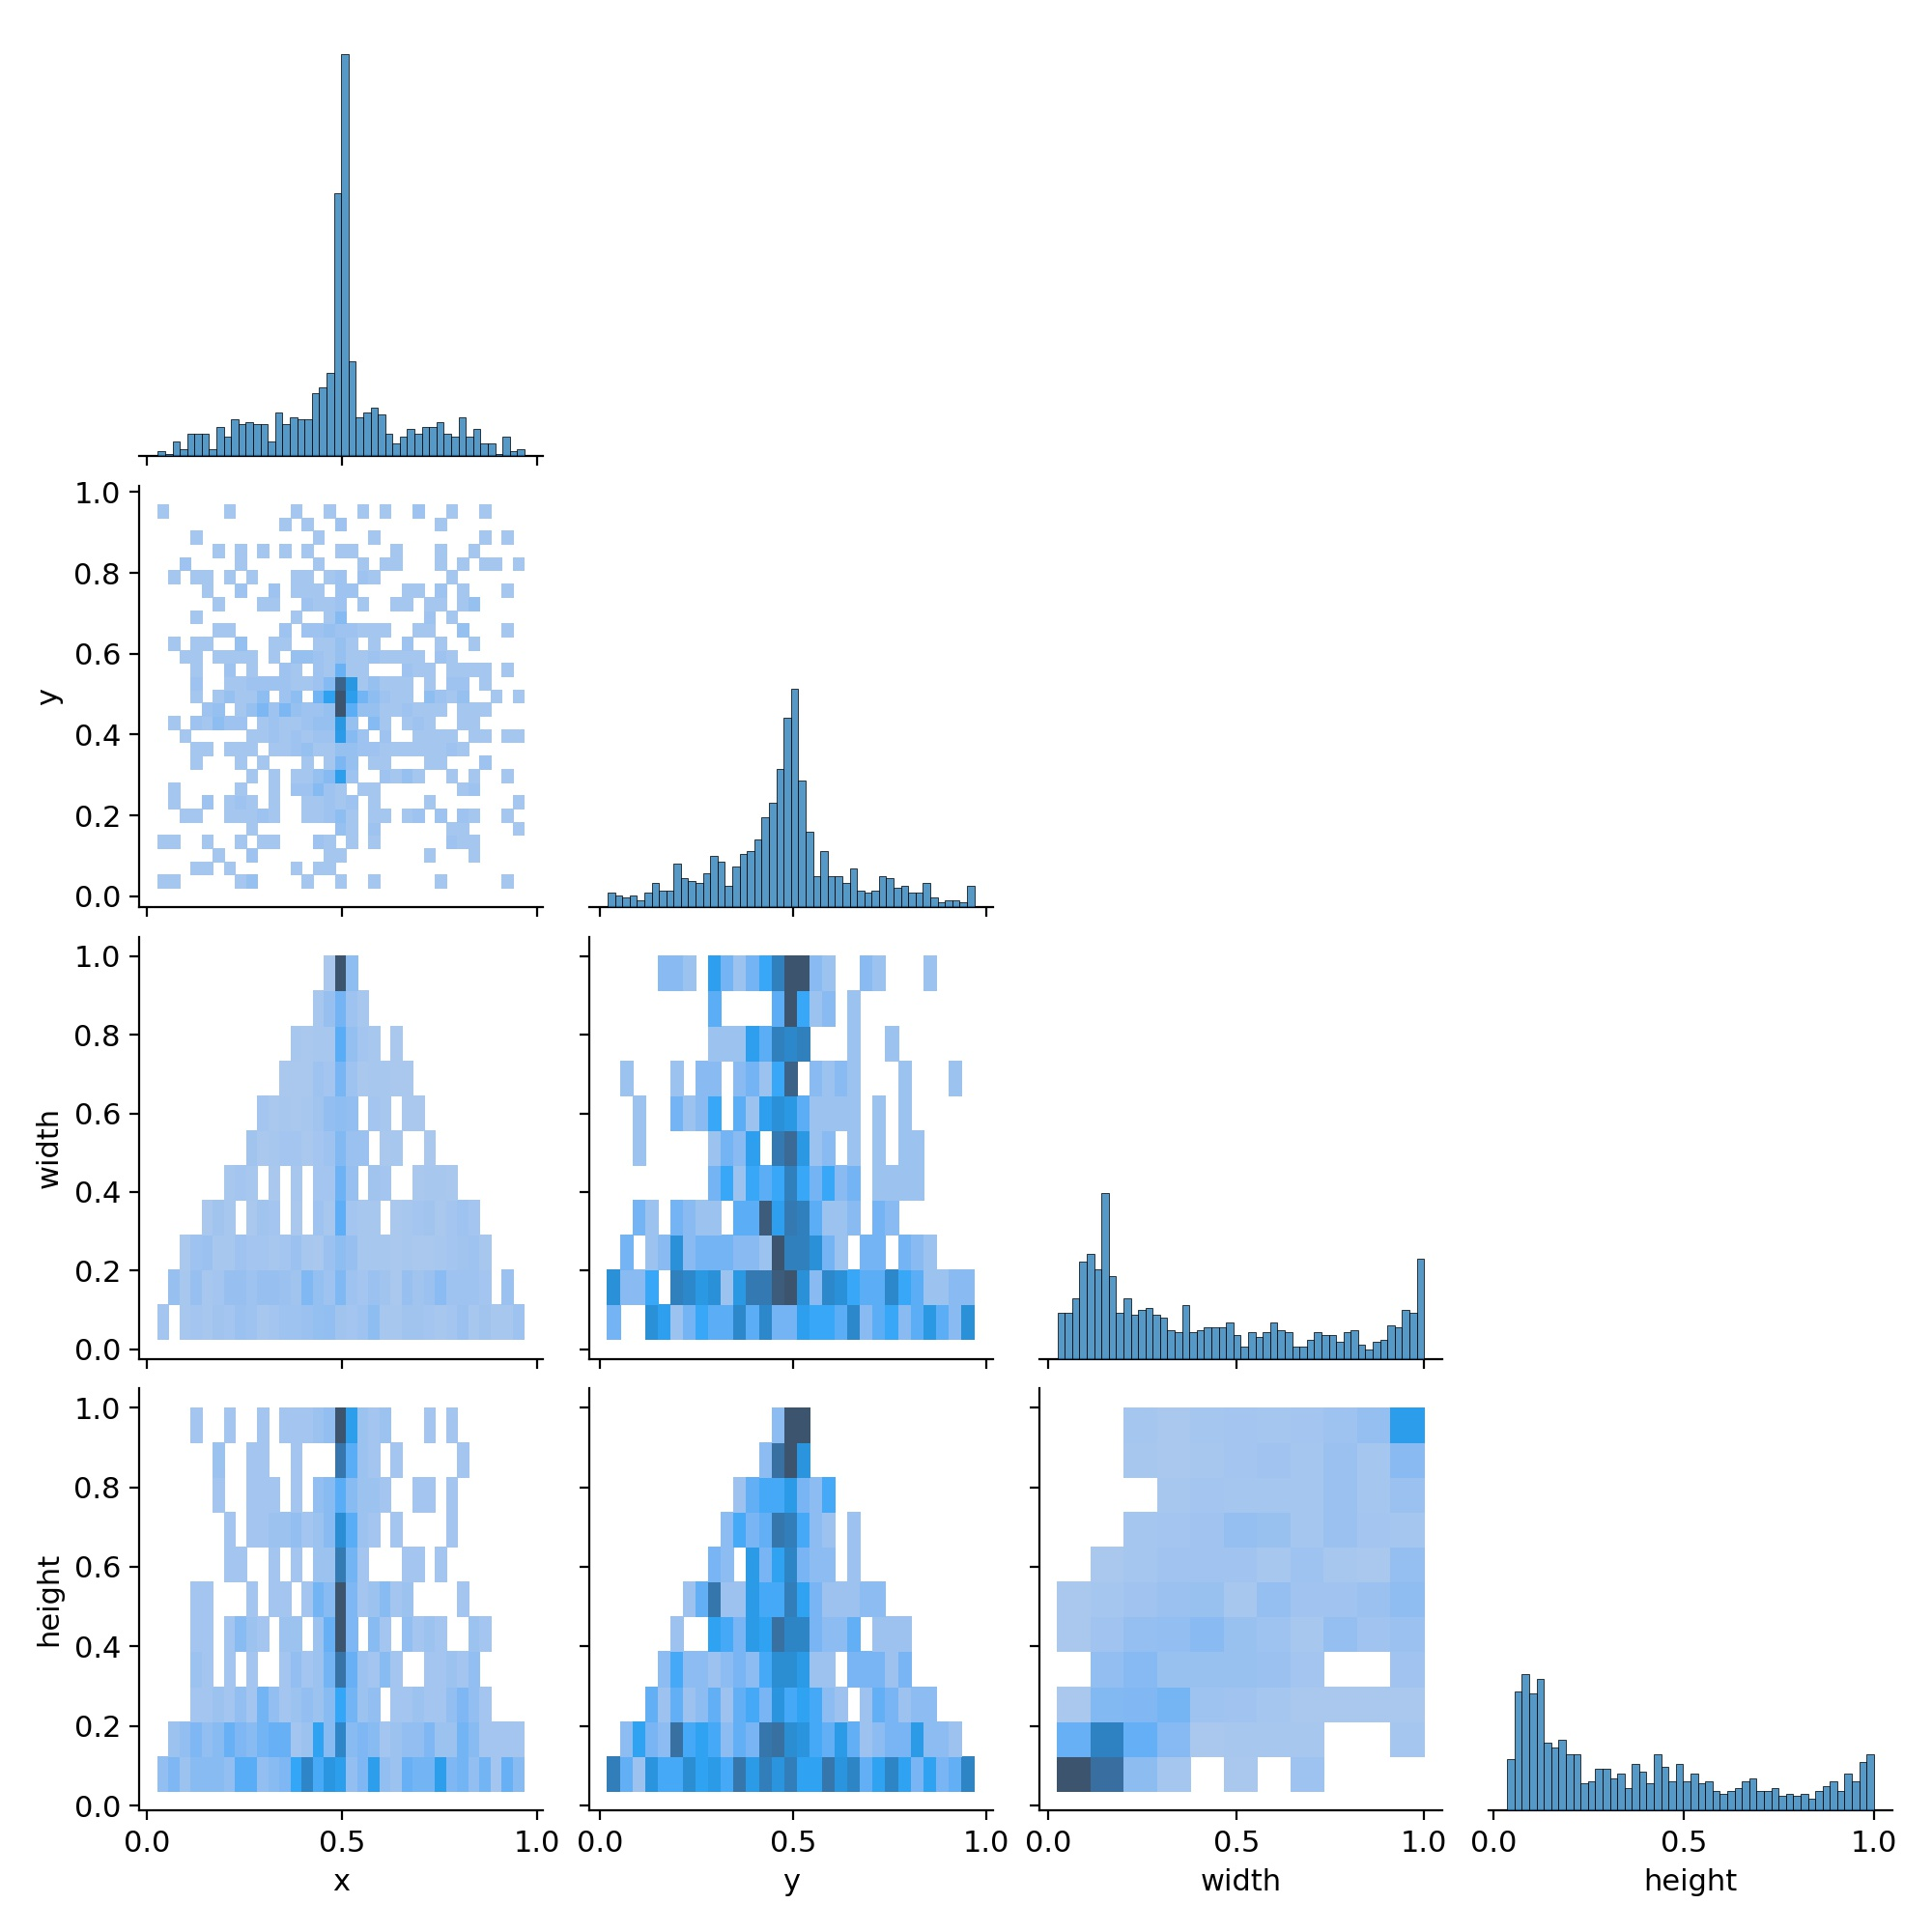

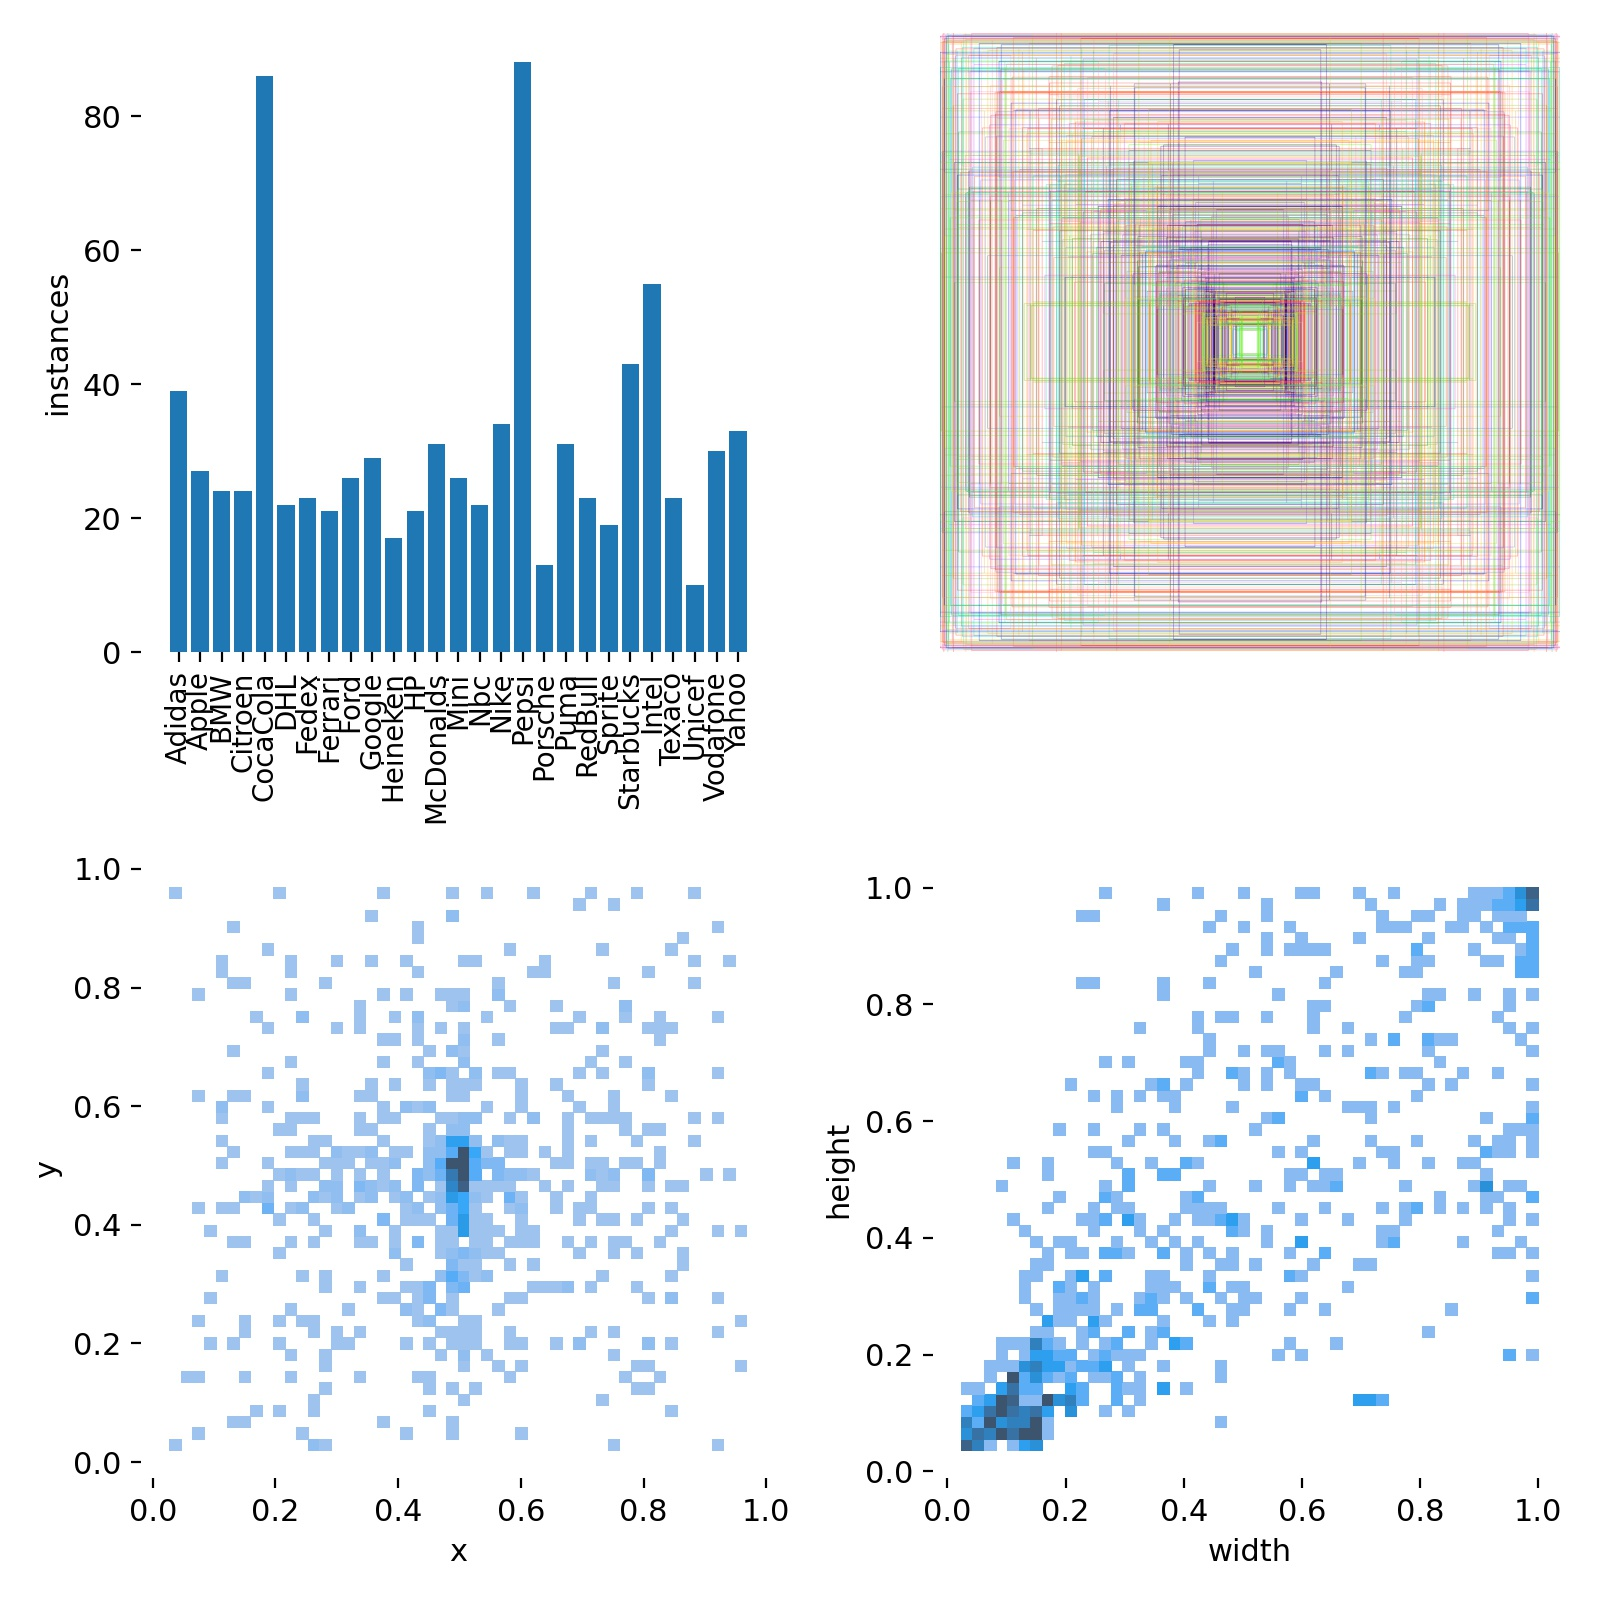

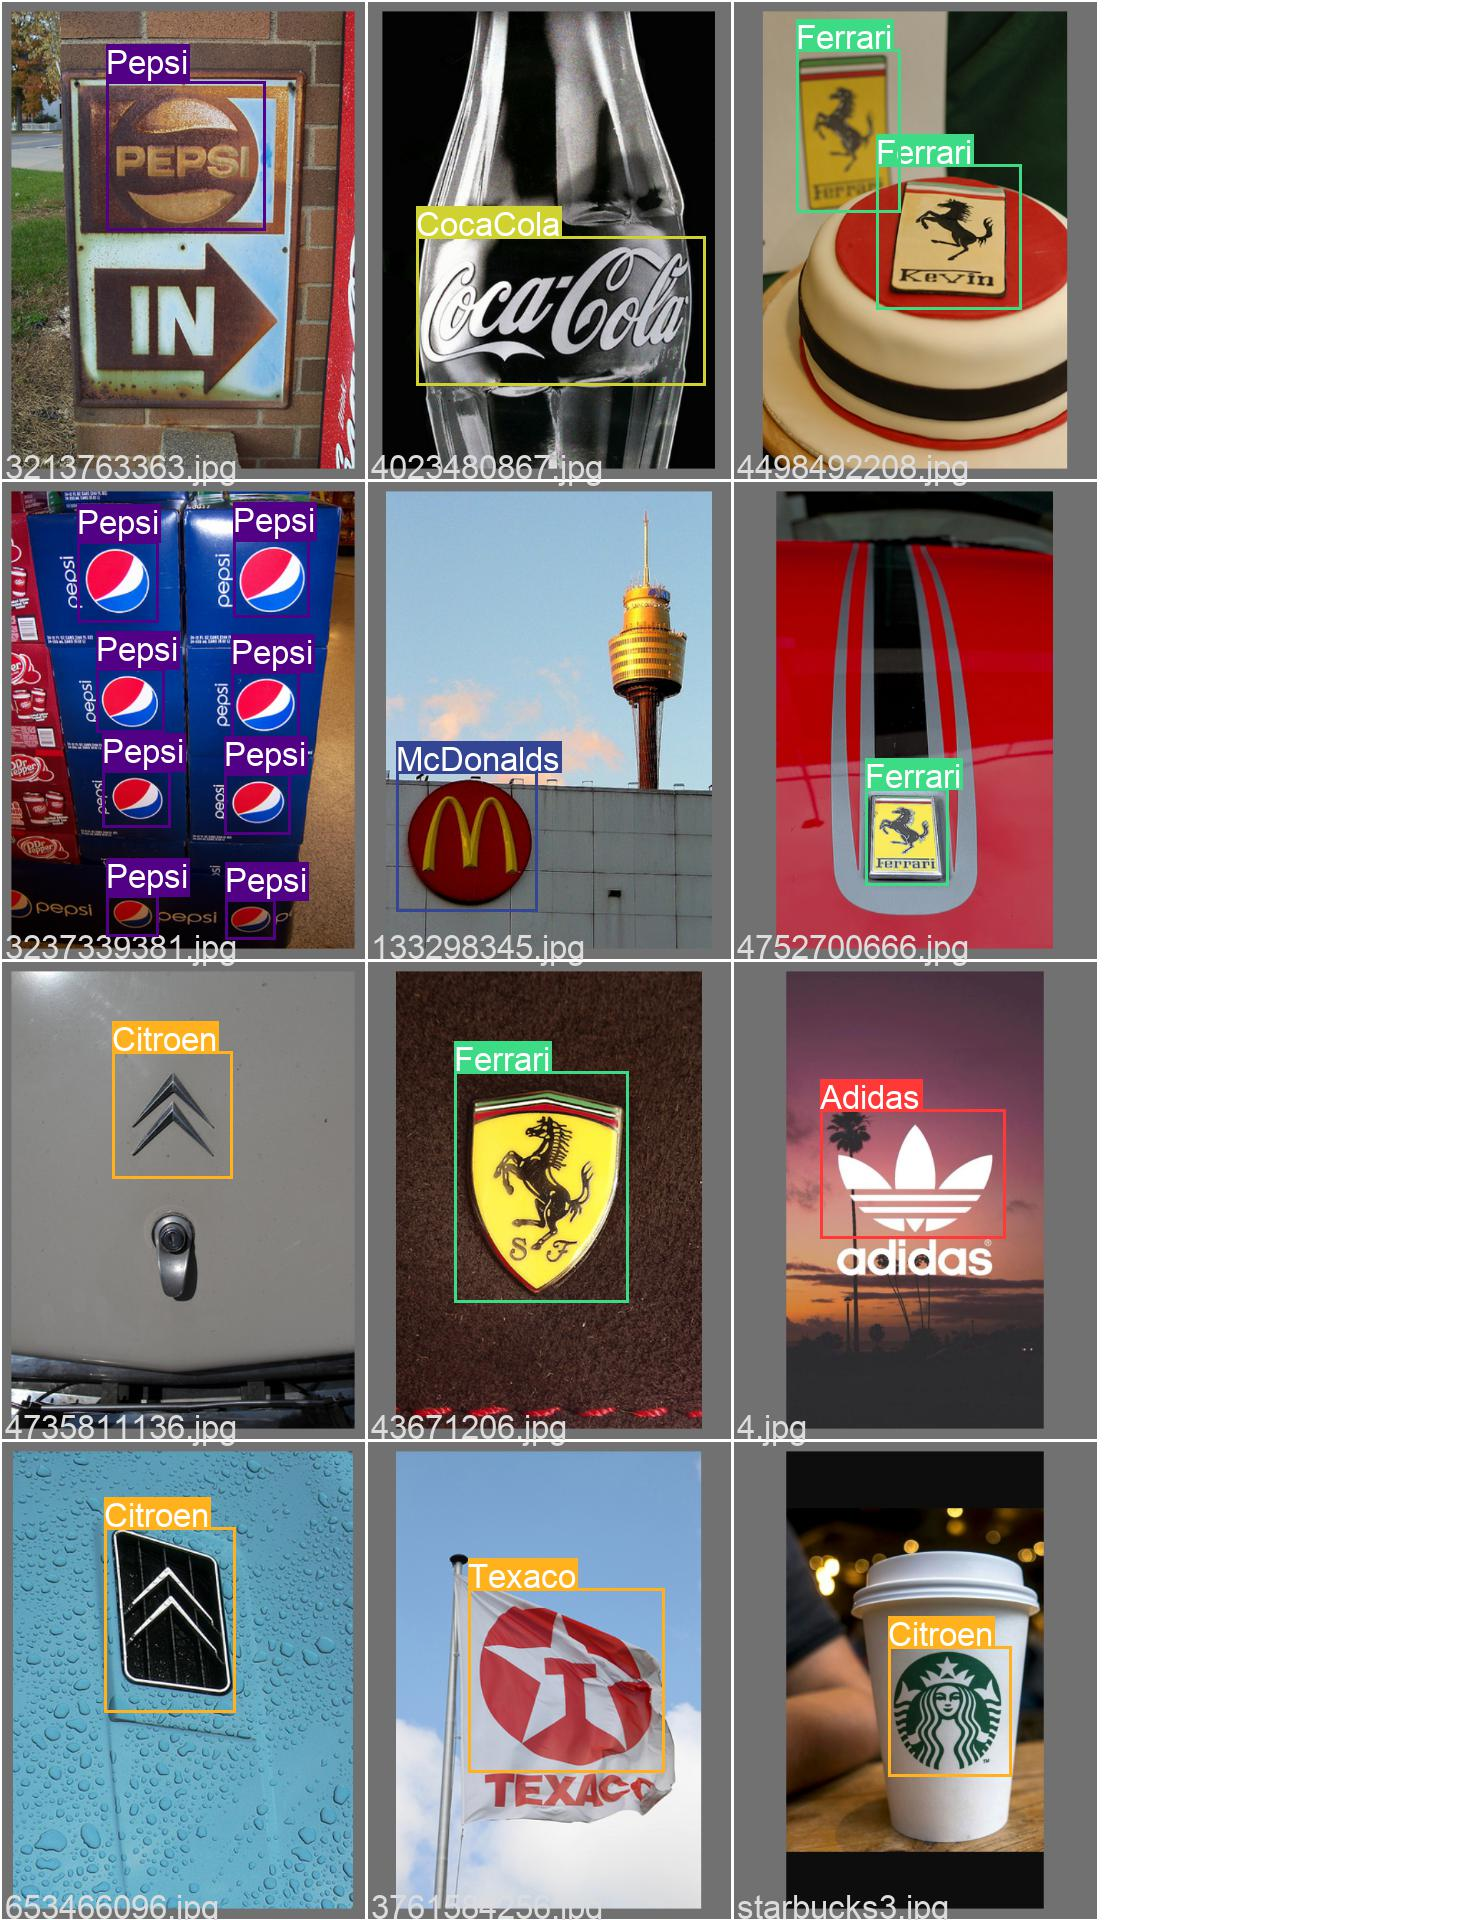

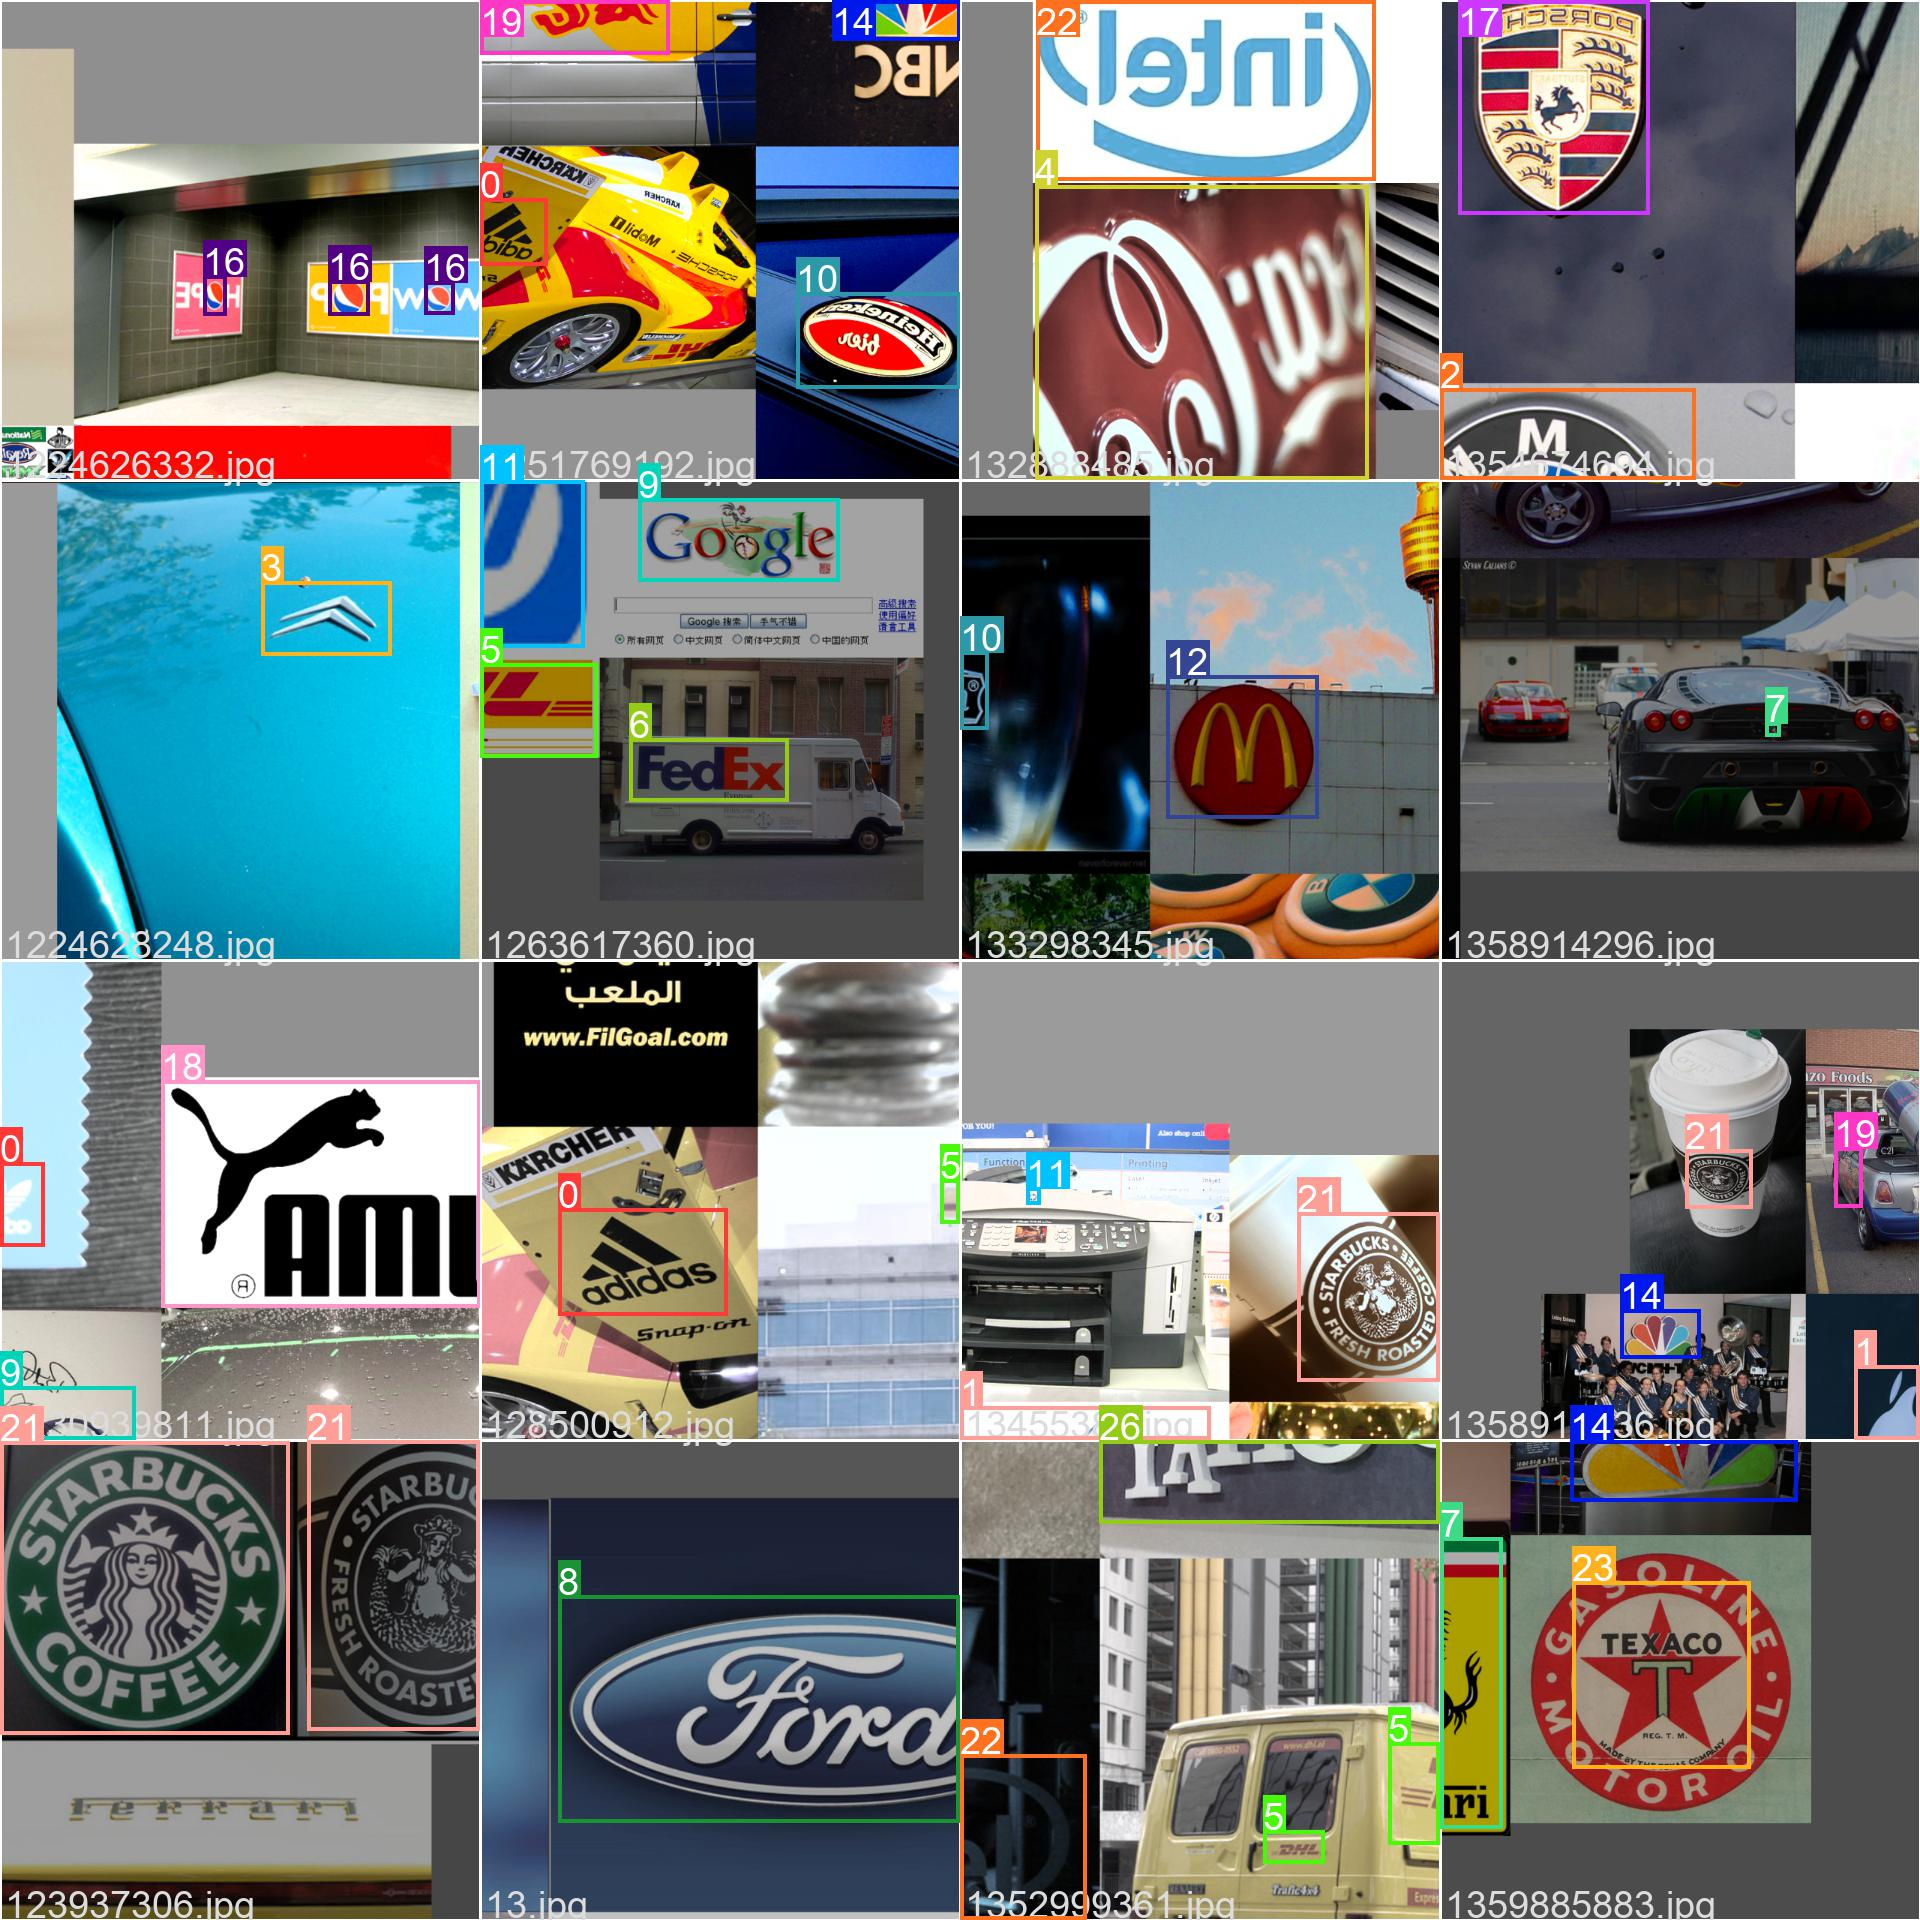

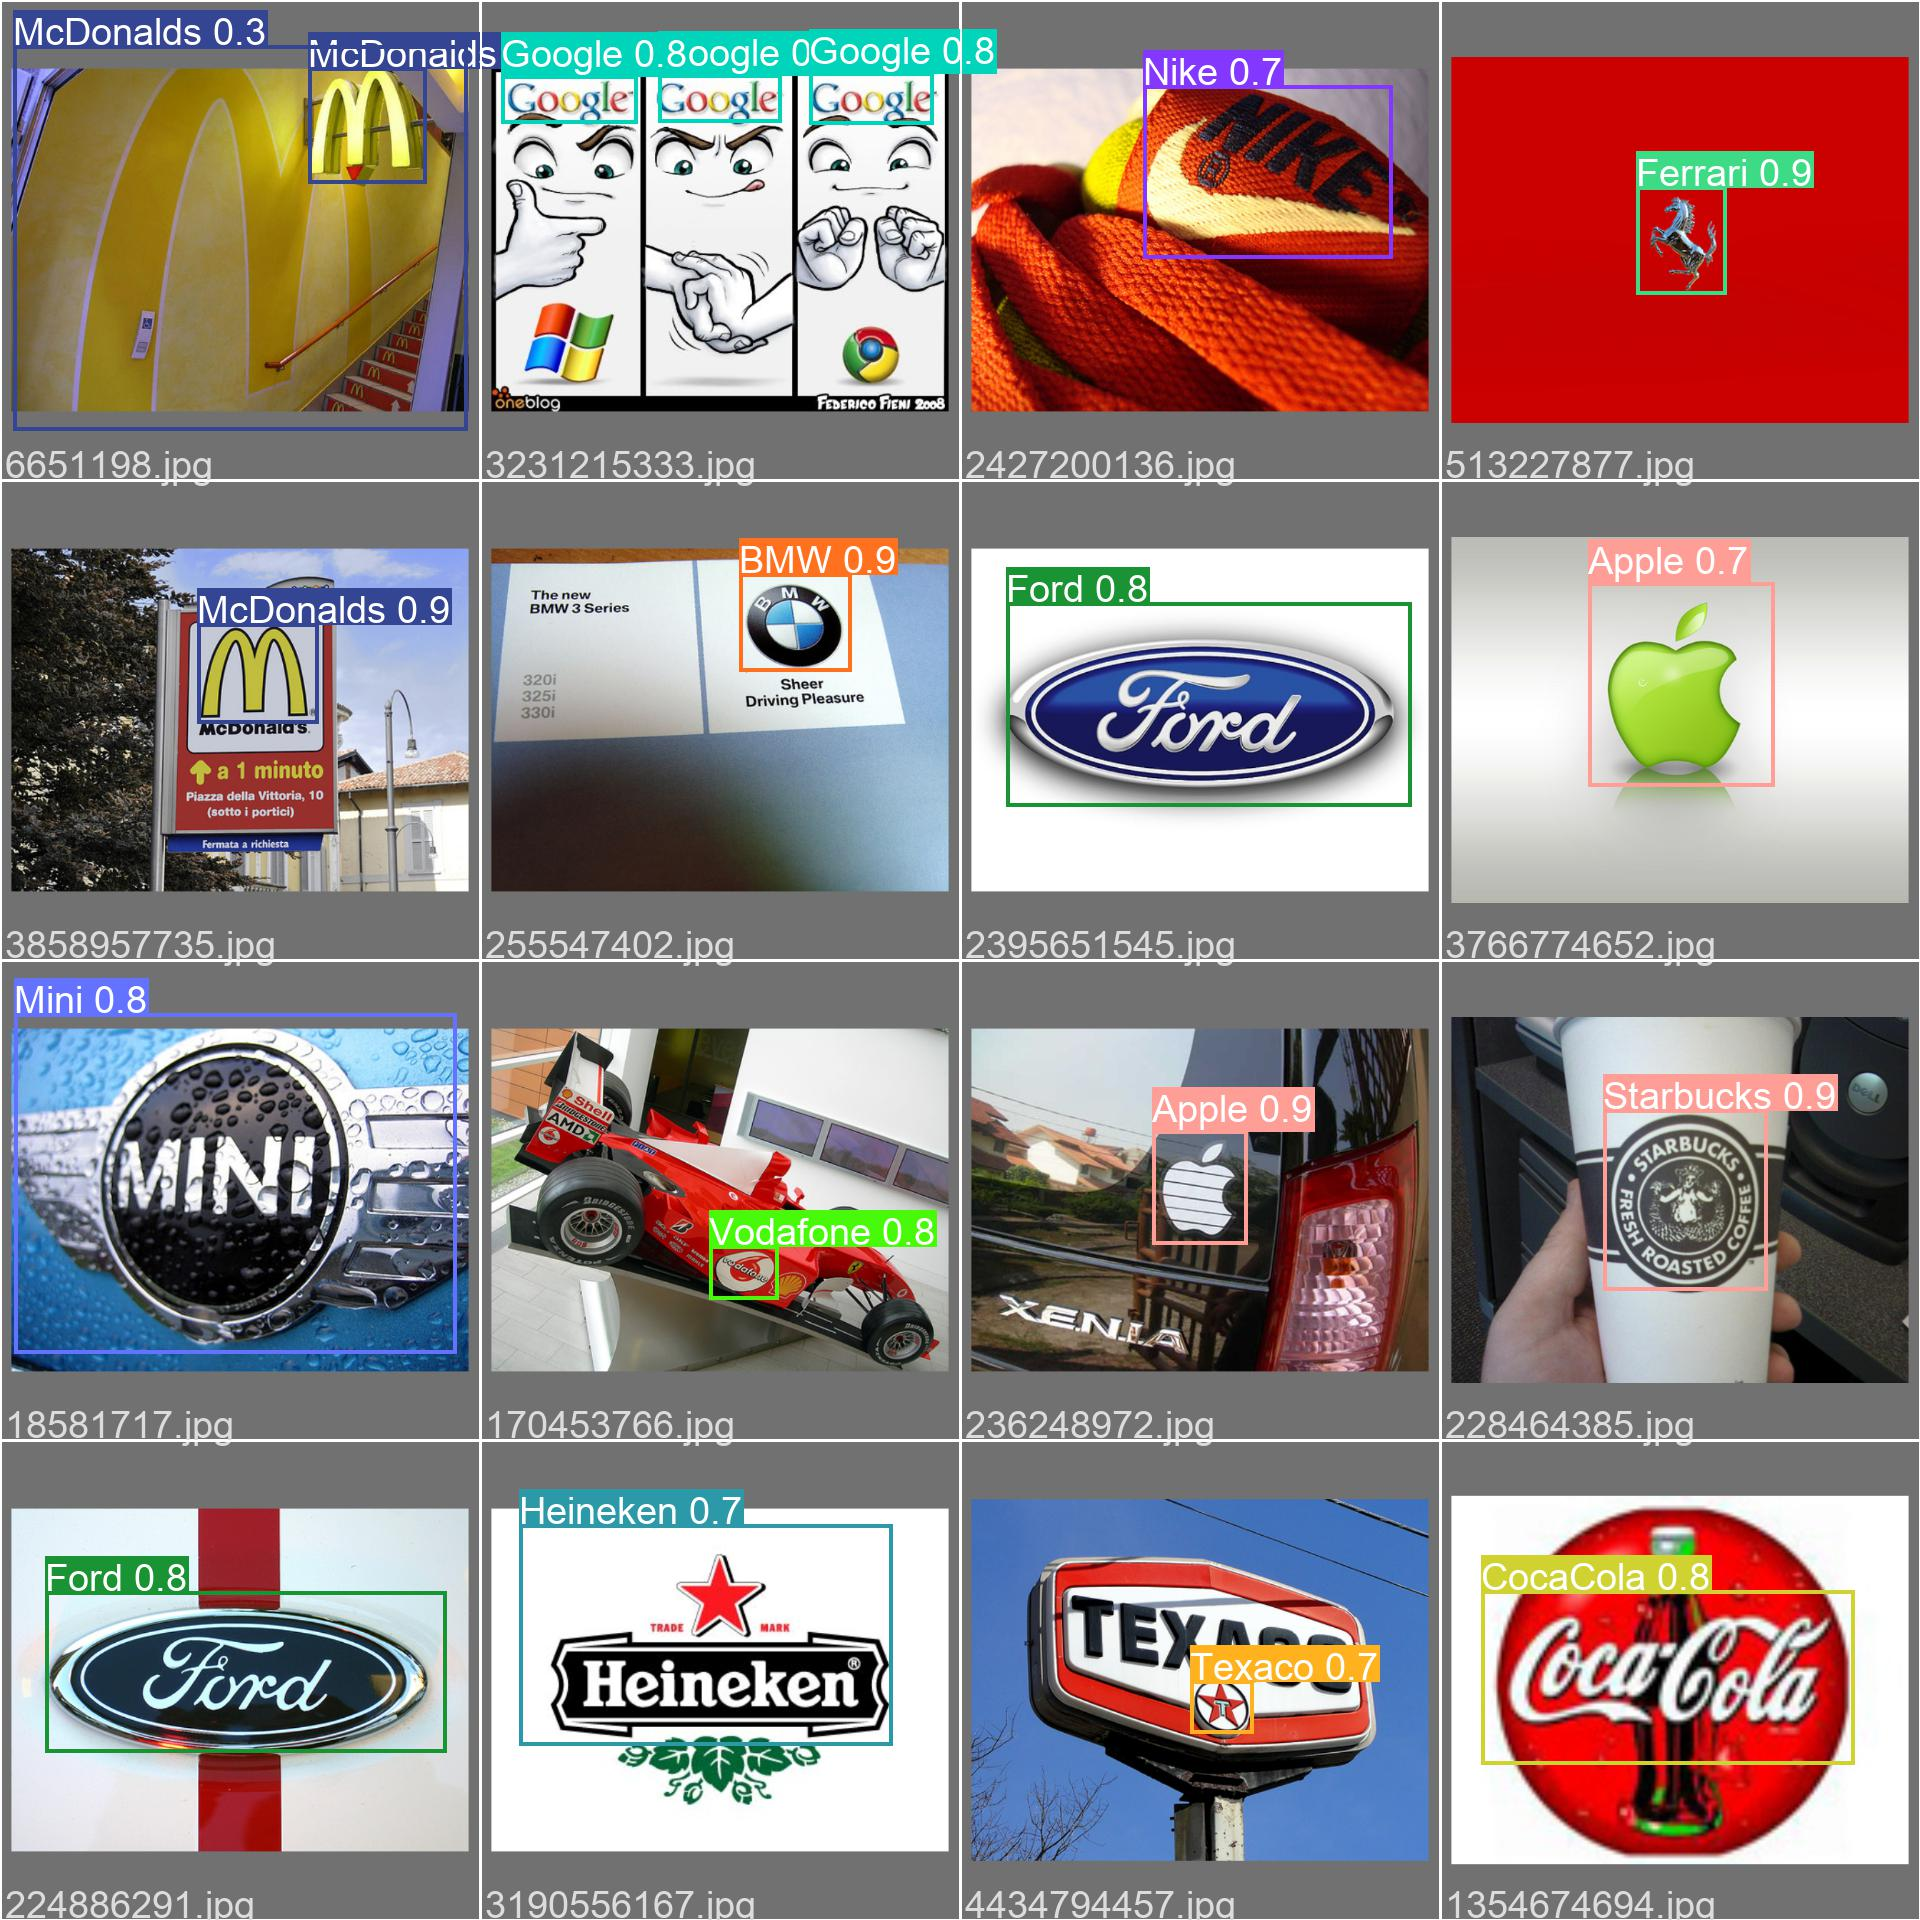

In [ ]:
#display inference on ALL test images

import glob
from IPython.display import Image, display

for imageName in glob.glob('/content/yolov5/runs/train/exp2/*.jpg'): #assuming JPG
    display(Image(filename=imageName))
    print("\n")

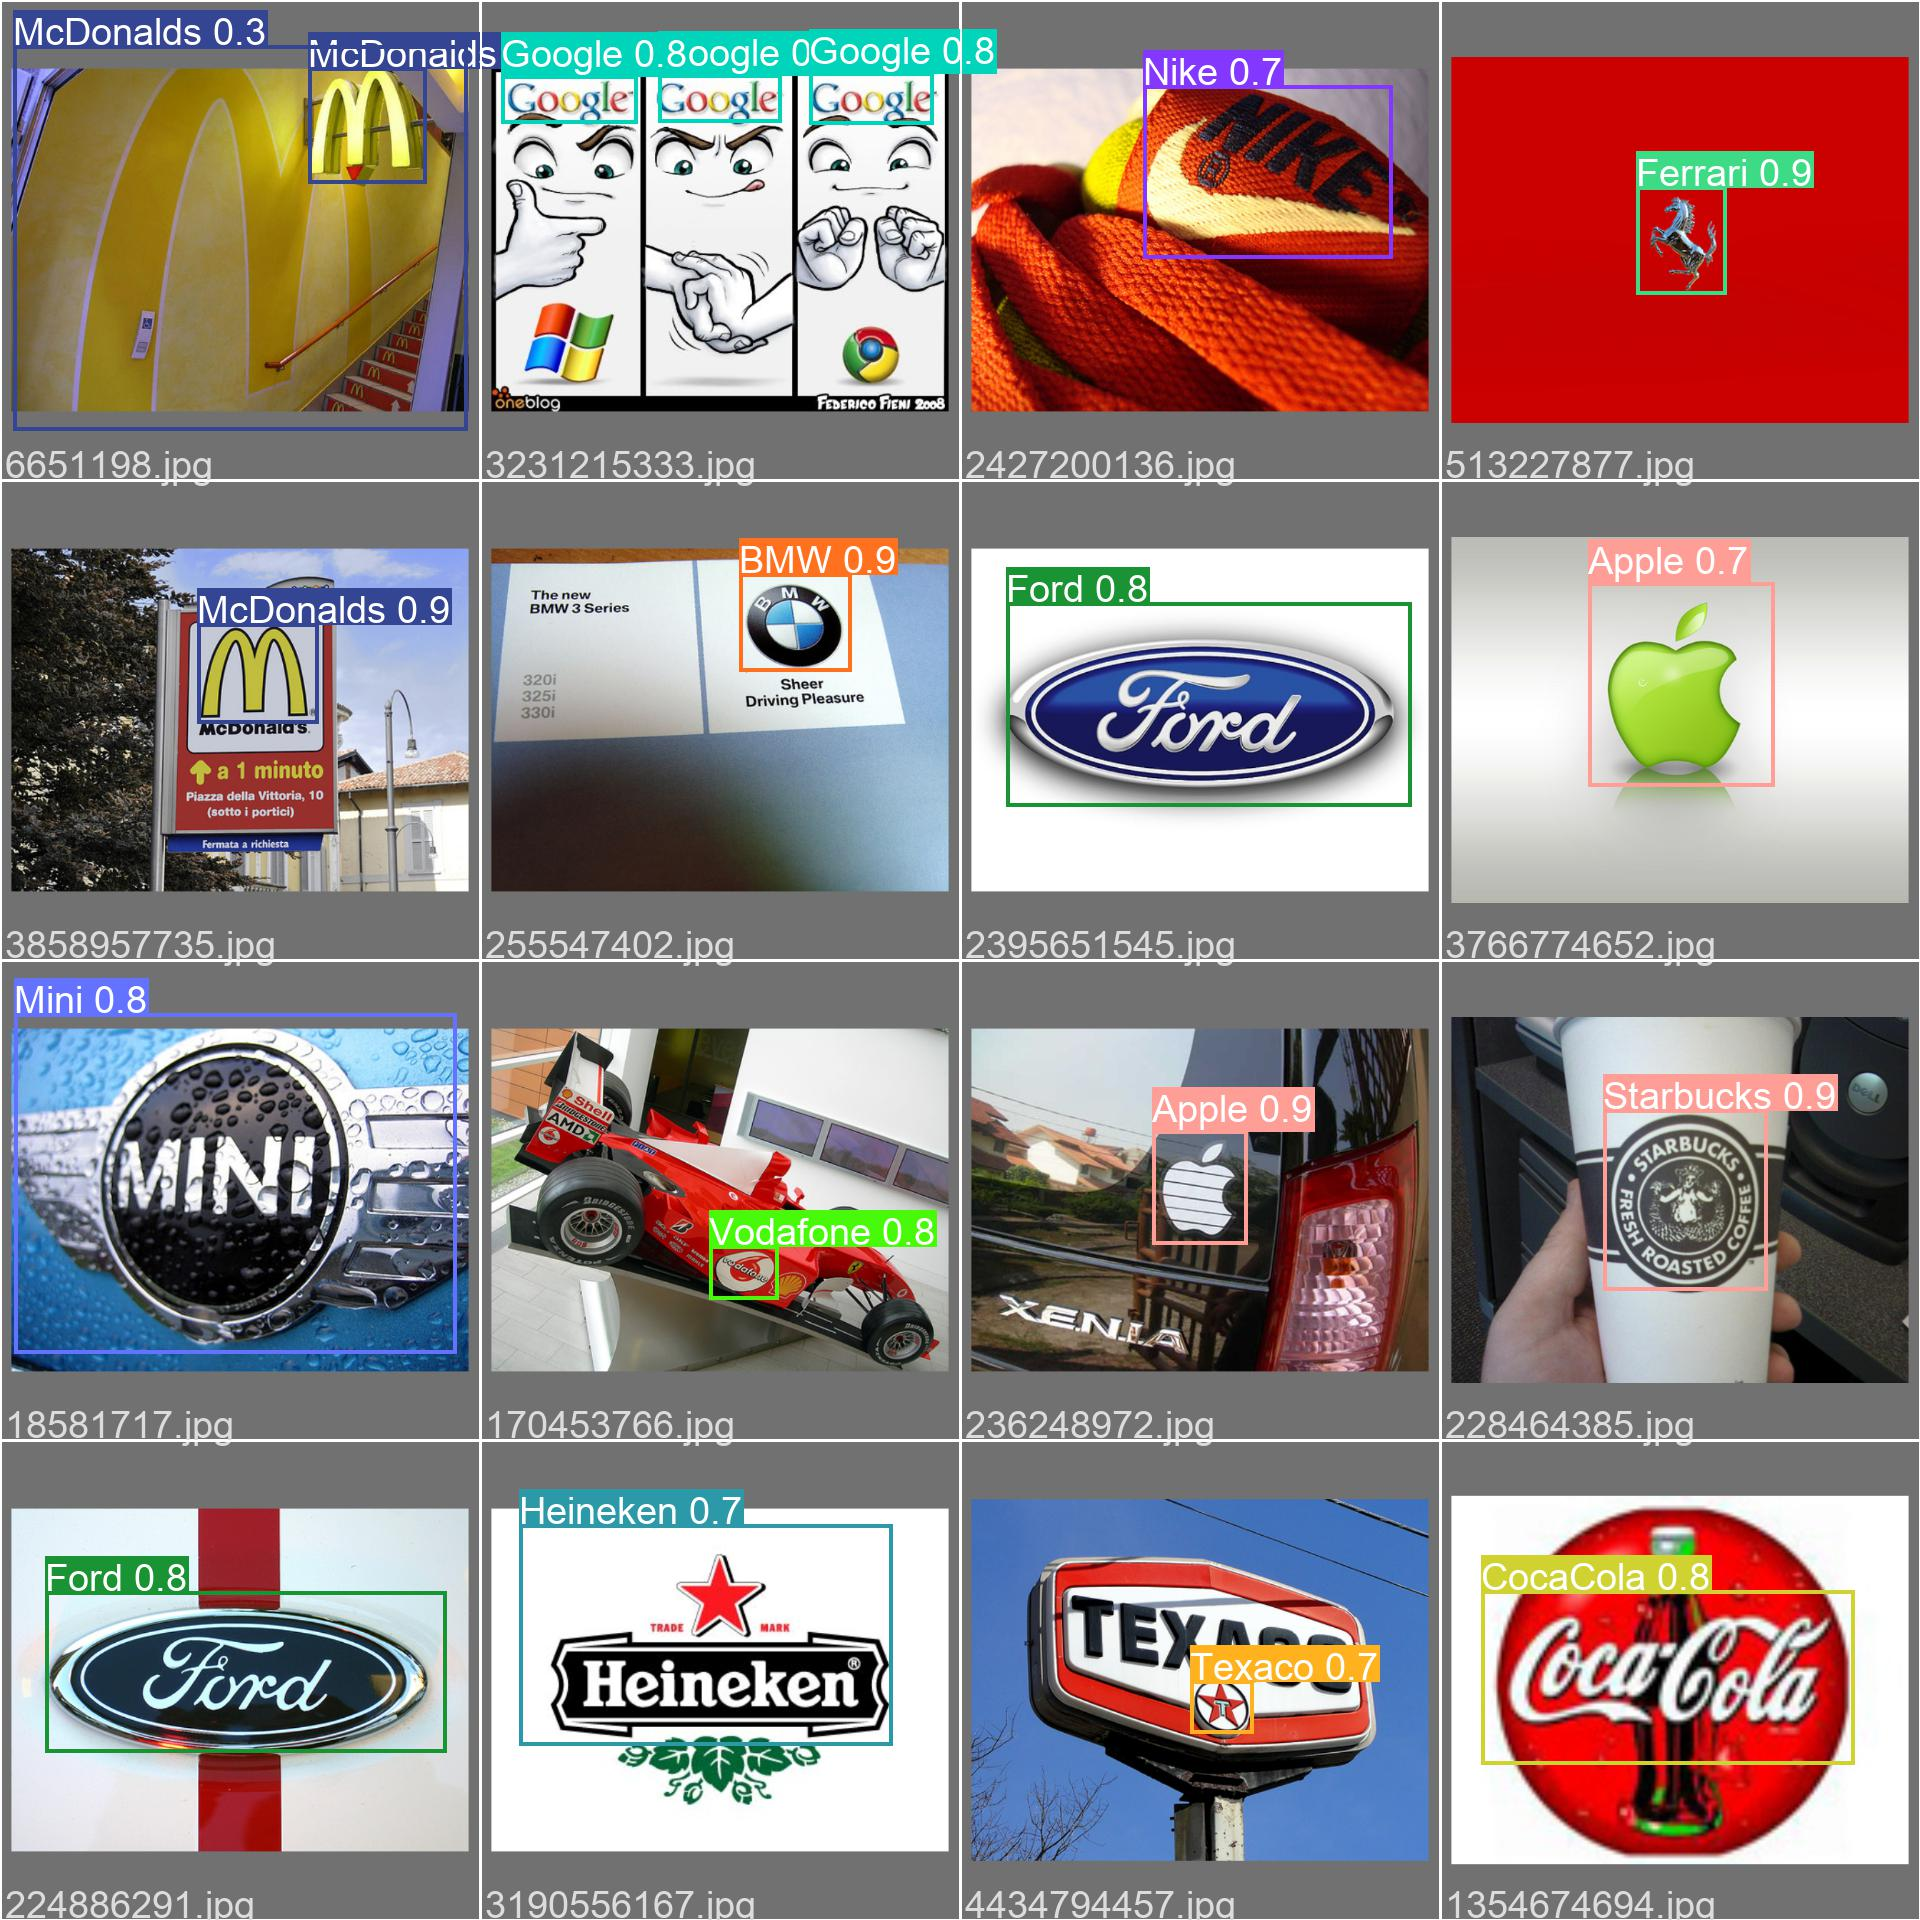

In [ ]:
import glob
from IPython.display import Image, display

imageName= "/content/yolov5/runs/train/exp2/val_batch1_pred.jpg"
display(Image(filename=imageName))

**6. downloading the trained weigths of images**

In [ ]:
#export your model's weights for future use
from google.colab import files
files.download('./runs/train/exp2/weights/best.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **7.plotting Results**
Training results are automatically logged to Tensorboard and CSV as results.csv, which is plotted as results.png (below) after training completes. You can also plot any results.csv file manually:

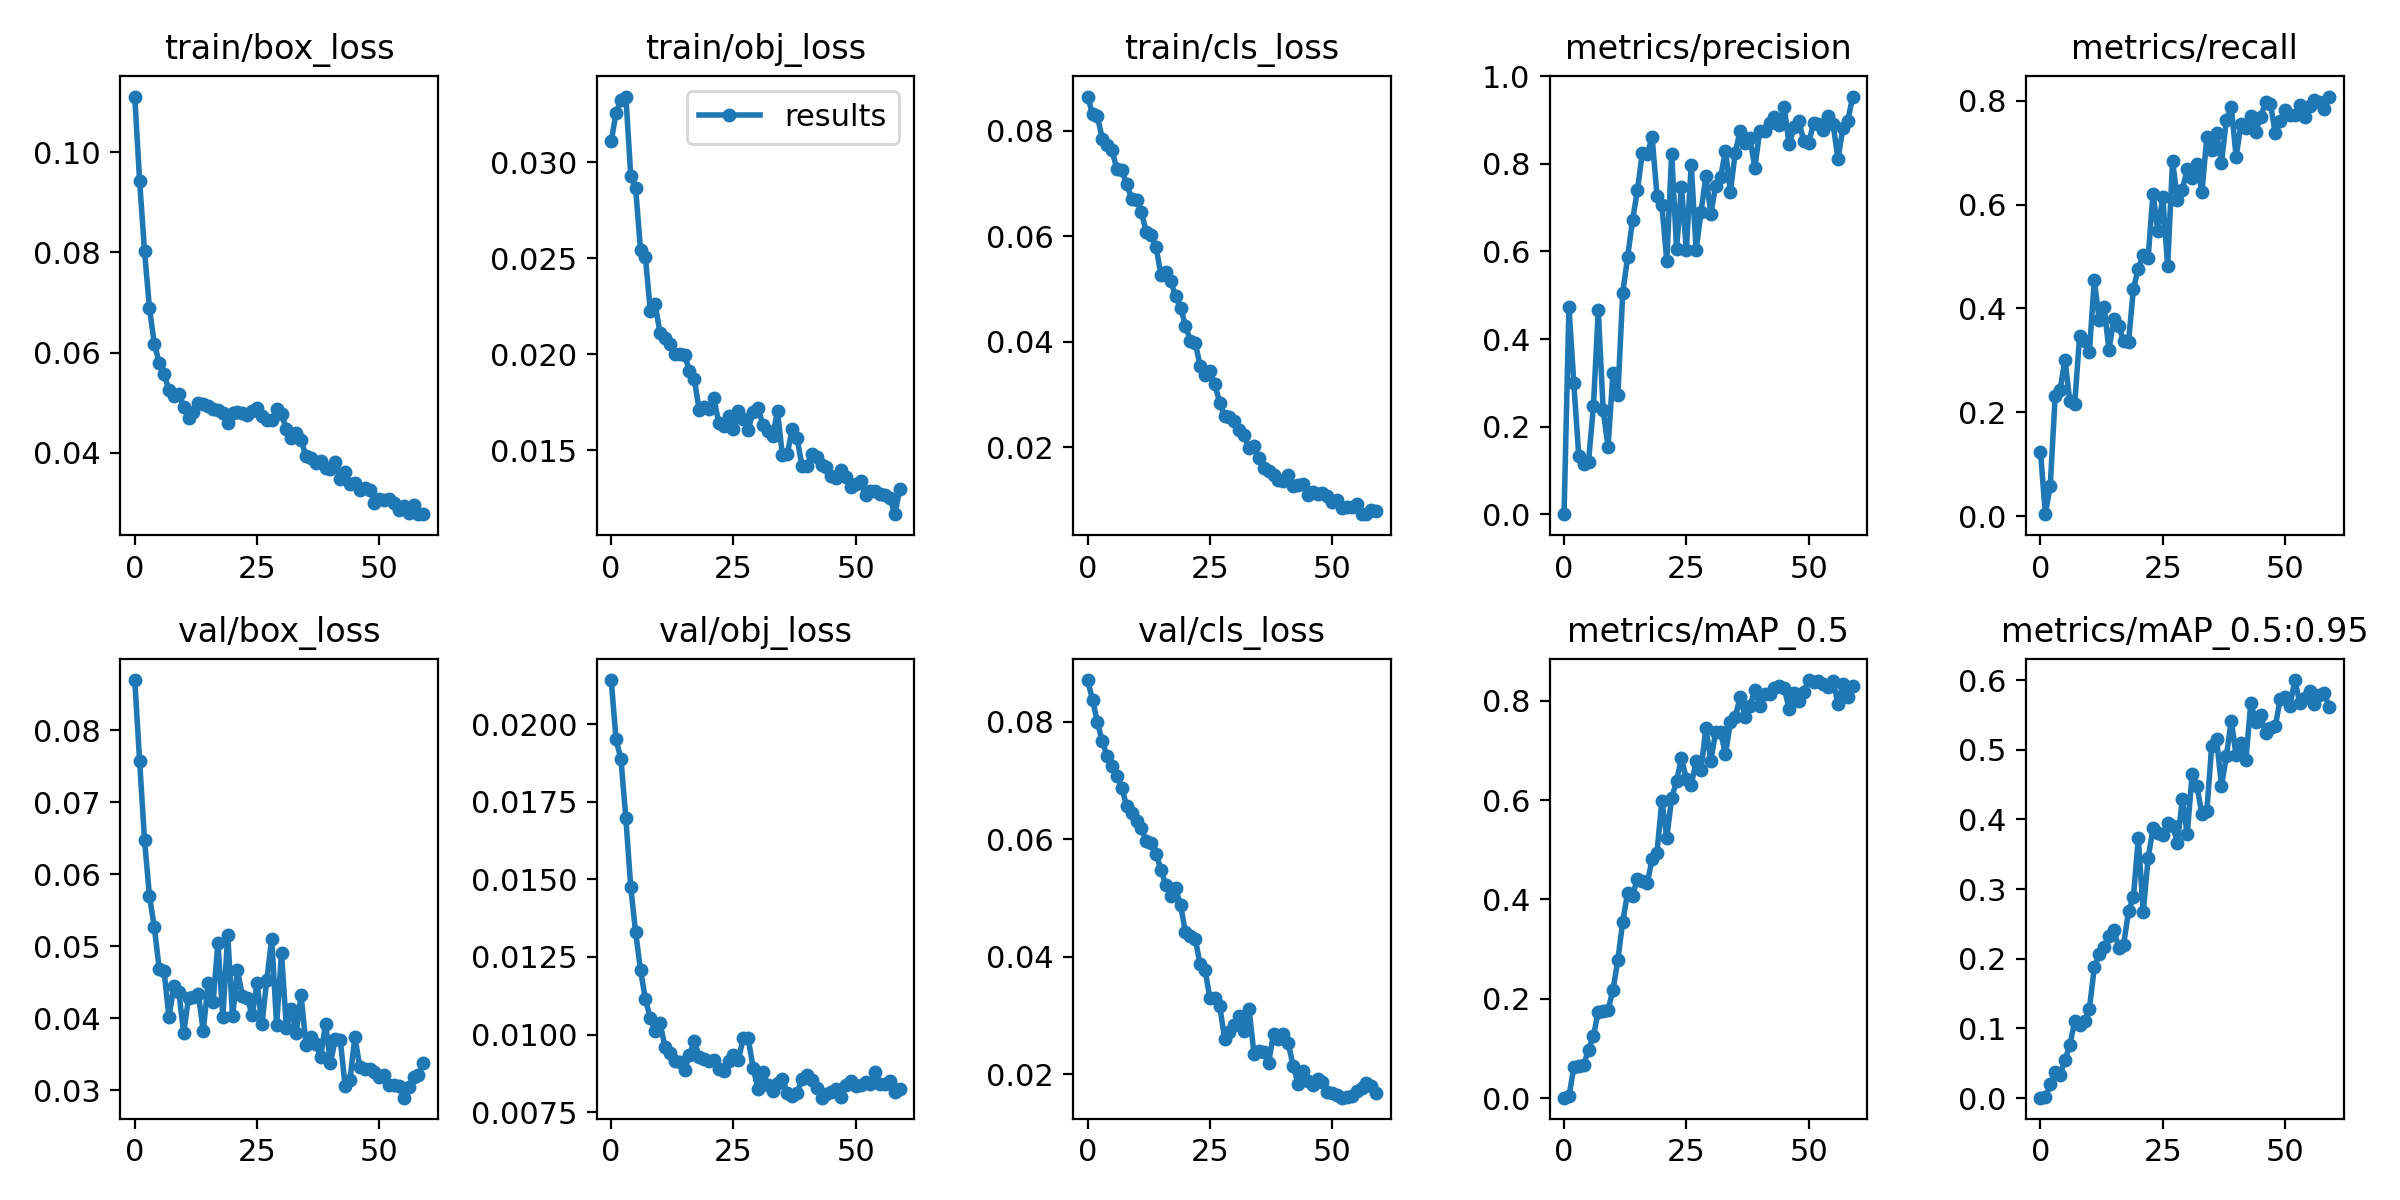

In [ ]:
import glob
from IPython.display import Image, display

imageName= "/content/yolov5/runs/train/exp2/results.png"
display(Image(filename=imageName))

**8.Confusion Matrix**

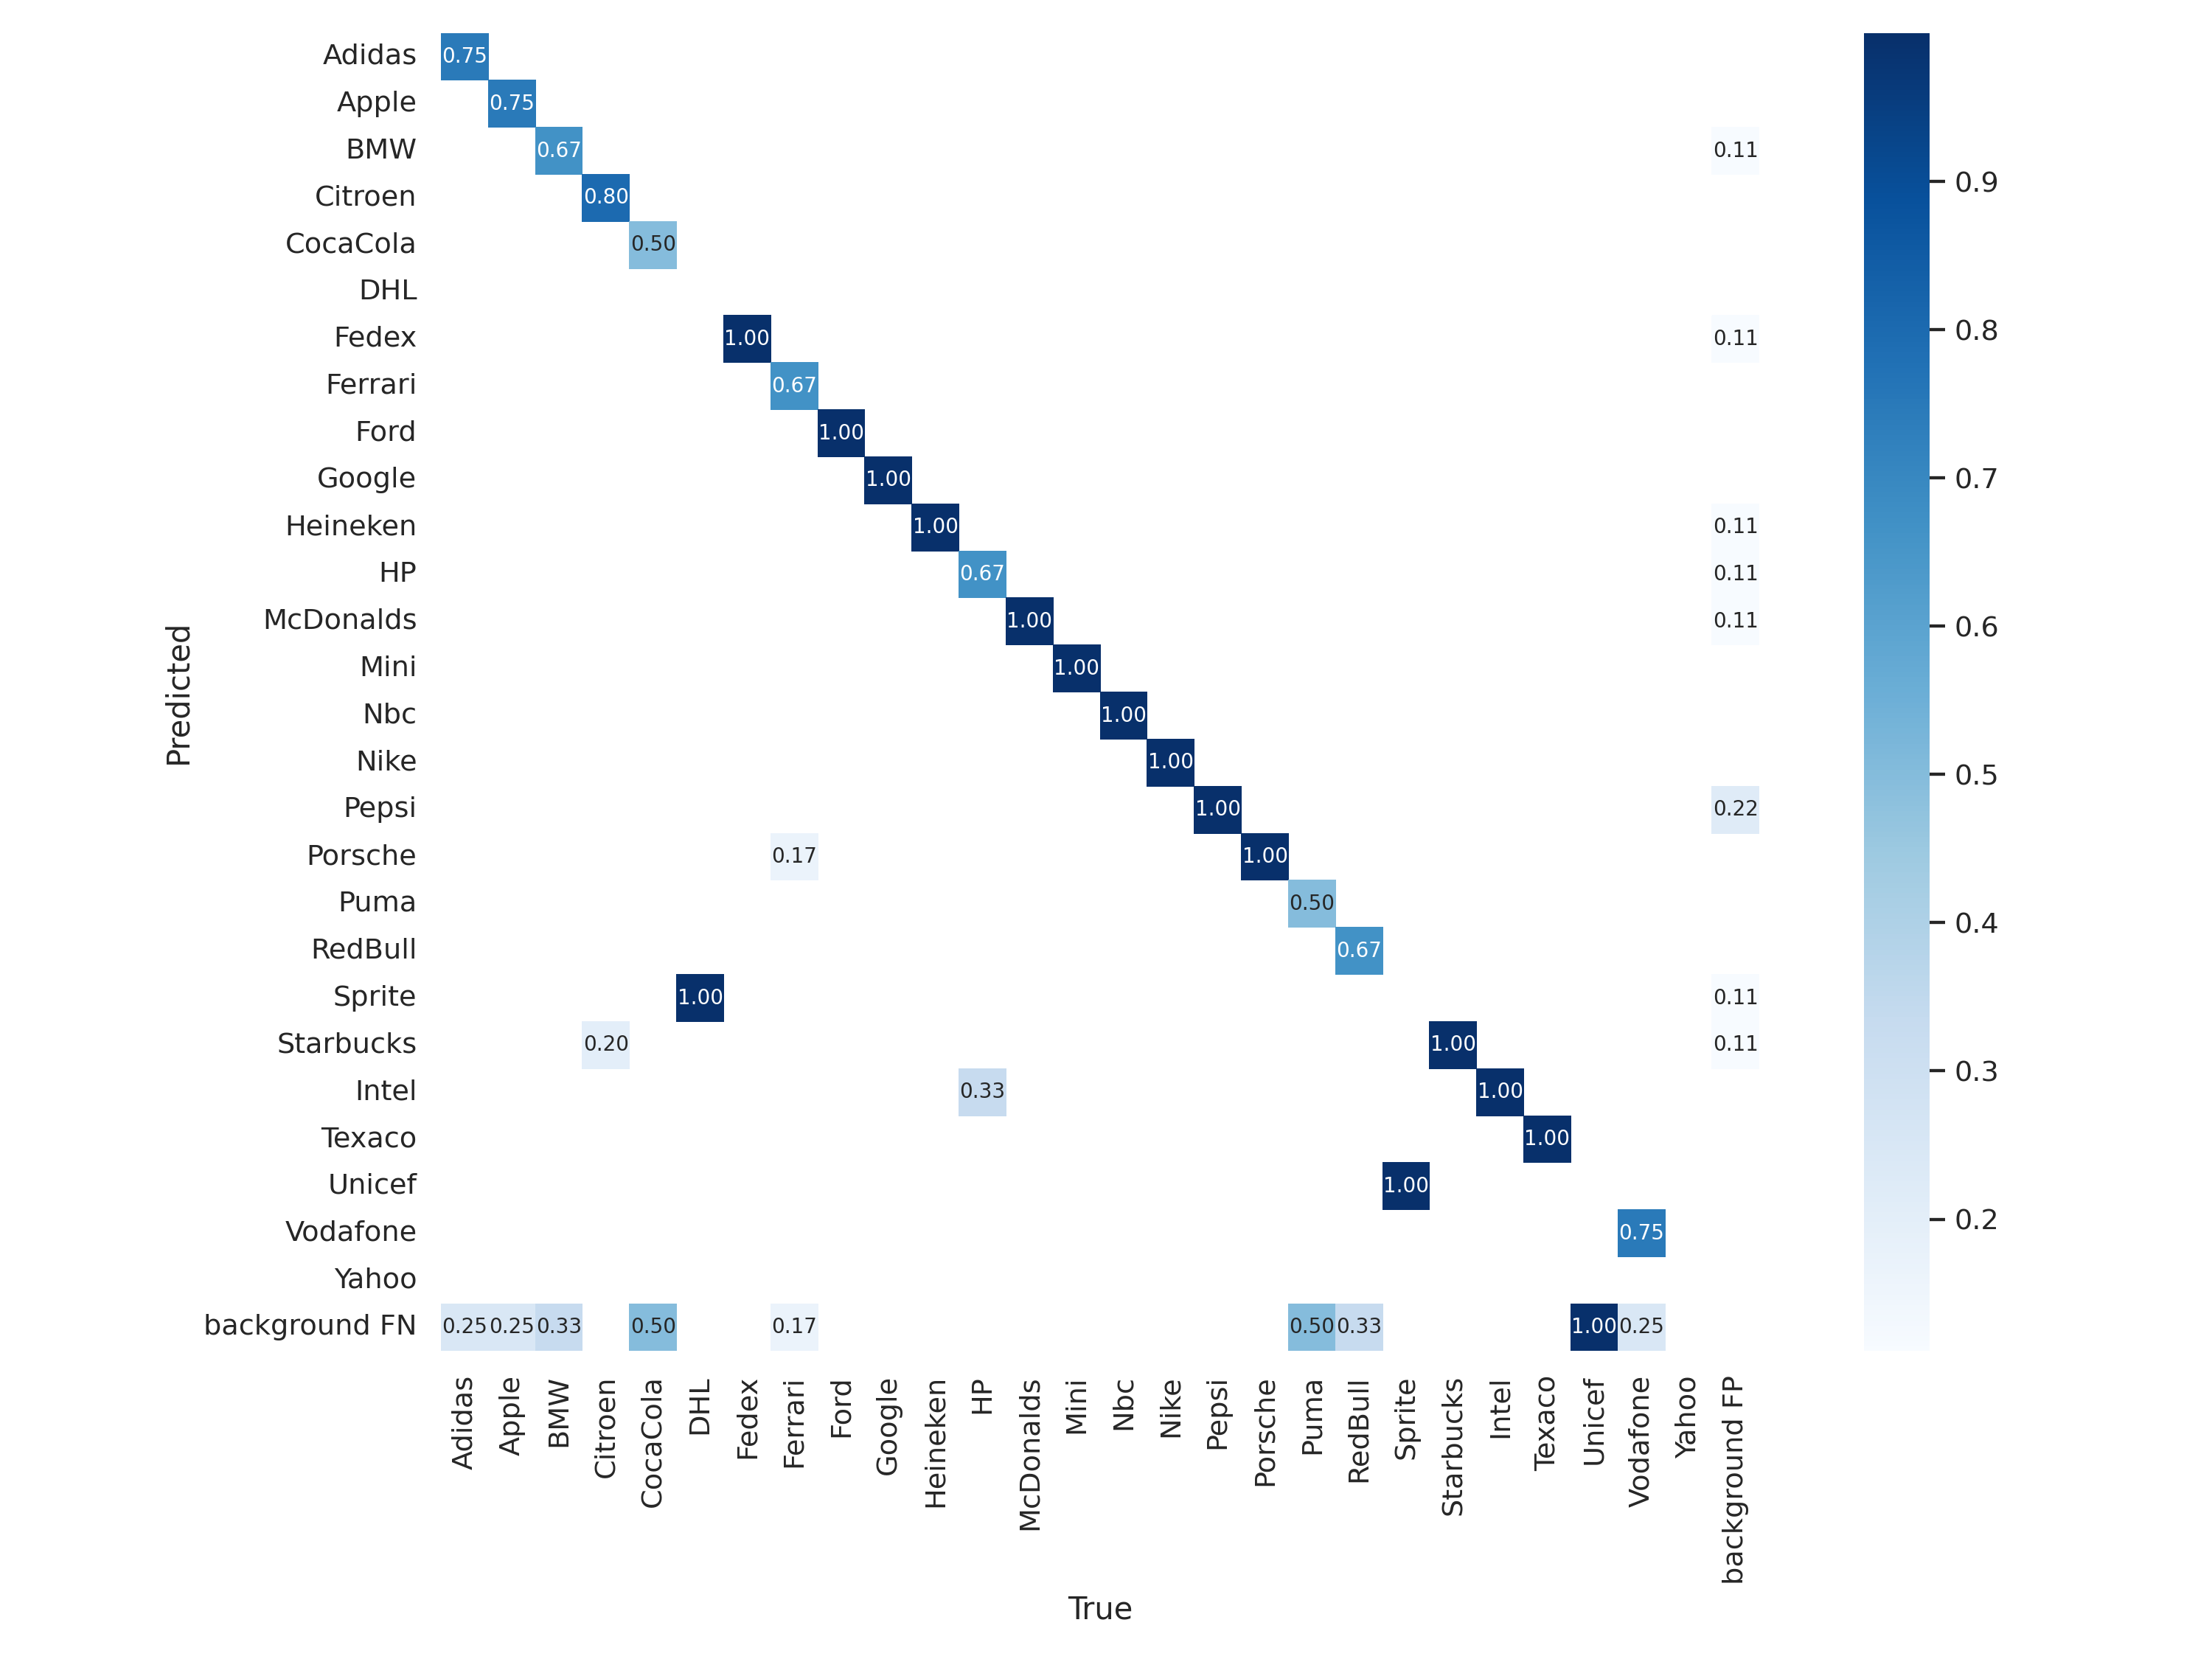

In [ ]:
import glob
from IPython.display import Image, display

imageName= "/content/yolov5/runs/train/exp2/confusion_matrix.png"
display(Image(filename=imageName))

**10.Detection**

detect.py runs YOLOv5 inference on a variety of sources, downloading models automatically from the latest YOLOv5 release, and saving results to runs/detect. Example inference sources are:

In [ ]:
!python detect.py --weights runs/train/exp2/weights/last.pt --img 640 --conf 0.35 --source ../5.jpg

detect: weights=['runs/train/exp2/weights/last.pt'], source=../5.jpg, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False
YOLOv5 🚀 v5.0-493-g1922dde torch 1.9.0+cu102 CUDA:0 (Tesla K80, 11441.1875MB)

Fusing layers... 
Model Summary: 224 layers, 7124032 parameters, 0 gradients, 16.6 GFLOPs
image 1/1 /content/5.jpg: 384x640 1 Apple, Done. (0.025s)
Speed: 0.4ms pre-process, 25.4ms inference, 1.9ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp4


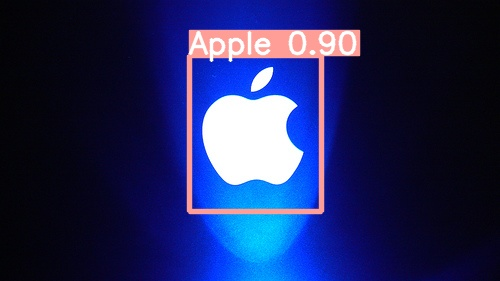

In [ ]:
import glob
from IPython.display import Image, display

imageName= "/content/yolov5/runs/detect/exp4/5.jpg"
display(Image(filename=imageName))

In [ ]:
!python detect.py --weights runs/train/exp2/weights/last.pt --img 640 --conf 0.35 --source ../